# Clifford Co.

**Date:** December 6, 2023

**Name:** Harsh Moom

Let's import the below libraries we will potential use in the future. Note sklearn will be imported as utilized.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Loading and Exploring the Data on High Level

#### 1.1 Loading Data

In [2]:
ecom_df = pd.read_csv('/Users/harshmoom/Desktop/3.Wed-O712/Project/O712 Group Project Data - eCommerce Customers.csv')

#### 1.2 Exploring the data

Let's start with visually inspecting the data:

In [3]:
ecom_df.shape

(12330, 13)

* There are a total of 13 fields and 12,330 records

In [4]:
ecom_df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay        VisitorType  Weekend  \
0         0.20       0.20         0.0         0.0  Returning_Visitor    False   
1         0.00       0.10         0.0         0.0  Returning_Visitor    False   
2         0.20       0.20         0.0         0.0  Returning_Visitor    False   
3         0.05       0.14         0.0         0.0  Returning_Visitor    False   
4         0.02       0.05         0.0         0.0  Returning_Visitor     True   

  Transaction  
0          No  
1          No  
2          No  
3          No  
4          No

In [5]:
ecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  VisitorType              12330 non-null  object 
 11  Weekend                  12330 non-null  bool   
 12  Transaction              12330 non-null  object 
dtypes: bool(1), float64(7), int64(3), object(2)
memory usage: 1.1+ MB


* 3 fields are qualitative and 10 are numerical.
   * Qualitative: 1 Boolean dtype and 2 Object dtypes 
   * Numercial: 7 Float dtypes and 3 Integer dtypes
* For Machine Learning:
    * Based upon below Data Exploring, there are 11 predictors. **Transaction** is our binary outcome of interest (yes or no to a purchase).
    * For the categorical variables, we will need to use **One-hot Encoding** (later on).
* There are no Null values in the dataset or unexpected values in our categorical fields. Additional data clean up is not required at the moment.

To understand the basic statistics of quantitative fields:

In [6]:
ecom_df.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  
count  12330.000000  12330.000000  12330.000000  12330.000000  
mean       0.022191      0.043073      5.889258      0.061427  
std        0.048488      0.048597     18.568437      0.198917  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.014286      0.000000      0.000000  
50%        0.003112      0.025156      0.000000      0.000000  
75%        0.016813      0.050000      0.000000      0.000000  
max        0.200000      0.200000    361.763742      1.000000

* Based on the above, the range of values within numerical fields differs considerably. We will need to **Scale our Data** (later on), to ensure our machine learning models do not create unreasonably large/small coefficients due to the presence of large/small outliers in the data.

To ensure the results within qualitative fields aligns to our expectations, we will retrieve unique values in the qualititative fields:

In [ ]:
duplicate_count = ecom_df.duplicated(keep = 'first').sum()
print(f"Total number of duplicates: {duplicate_count}")

* We have identified duplicates but we are not deleting them as there is no unique identifier to confirm each record is independent.

In [7]:
ecom_df['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor'], dtype=object)

In [8]:
ecom_df['Weekend'].unique()

array([False,  True])

In [9]:
ecom_df['Transaction'].unique()

array(['No', 'Yes'], dtype=object)

To retrieve list of column/field names, will allow for easier copy/paste in coding:

In [10]:
list(ecom_df.columns.values)

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'VisitorType',
 'Weekend',
 'Transaction']

### 2. Basic Data Visualization

#### 2.1 Visualizing Categorical Data

Let's understand how many visitor's made a purchase using a pie chart:

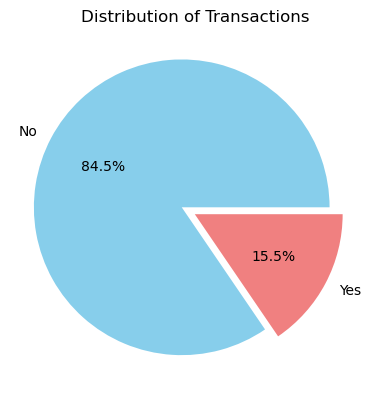

In [11]:
plt.pie(ecom_df['Transaction'].value_counts(normalize = True)*100, 
        labels = ecom_df['Transaction'].unique(), autopct = '%2.1f%%', explode=[0.1, 0], colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Transactions')
plt.show()

In [12]:
ecom_df['Transaction'].value_counts()

Transaction
No     10422
Yes     1908
Name: count, dtype: int64

* 15.5% of visitors (1,908) made a purchase, while 84.5% (10,422) did not

Let's have a look at purchasing trends based on weekday or weekend based on a tablular view and column chart:

In [13]:
ecom_df_crosstab = pd.crosstab(ecom_df['Transaction'],ecom_df['Weekend'], margins= False)

In [14]:
pd.crosstab(ecom_df['Transaction'], ecom_df['Weekend'], margins = True)

Weekend      False  True    All
Transaction                    
No            8053  2369  10422
Yes           1409   499   1908
All           9462  2868  12330

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

<Axes: xlabel='Weekend', ylabel='count'>

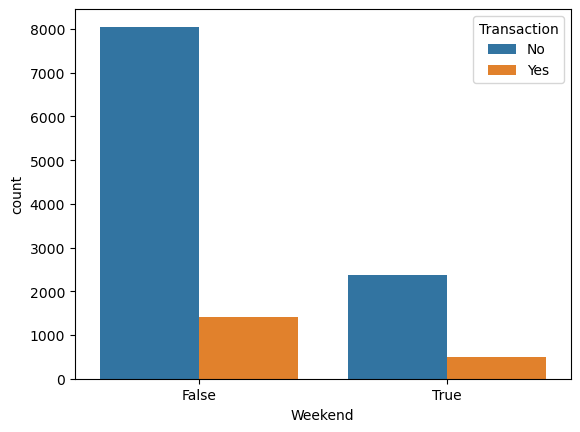

In [15]:
sns.countplot(x='Weekend',hue='Transaction',data=ecom_df)

* Website is visited more frequently on the Weekday
* 74% of those visitors (1,409) made a purchase on a Weekday

Let's breakdown the purchasing trend by visitor type:

In [16]:
ecom_df_crosstab2 = pd.crosstab(ecom_df['Transaction'],ecom_df['VisitorType'], margins= False)

In [17]:
pd.crosstab(ecom_df['Transaction'], ecom_df['VisitorType'], margins = True)

VisitorType  New_Visitor  Returning_Visitor    All
Transaction                                       
No                  1341               9081  10422
Yes                  438               1470   1908
All                 1779              10551  12330

* 77% of purchases are made by Returning Visitors (1,470)

Let's see the purchase trend, on average, closer to a special day:

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

<Axes: xlabel='VisitorType', ylabel='SpecialDay'>

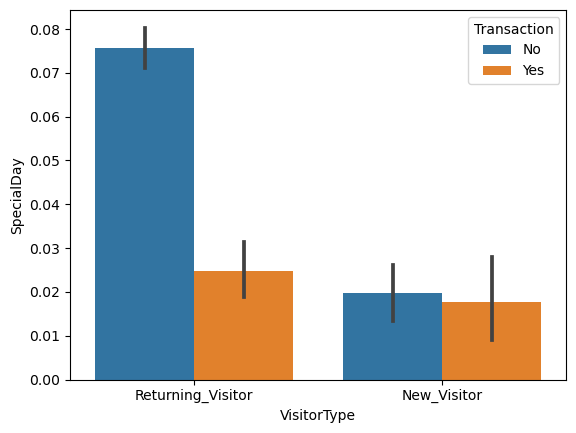

In [18]:
sns.barplot(x='VisitorType',y='SpecialDay',data=ecom_df,hue='Transaction')

* Based on the average, Special Days do not impact purchases, regardless of the type of visitor (New or Returning)
    * This aligns with the fact that most website visits occur on a Weekday

#### 2.2 Visualize Numerical Data

Let's try to understand the relationship between different variables within dataset. First let's look at Vistor Type and Page Values:

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

<Axes: xlabel='VisitorType', ylabel='PageValues'>

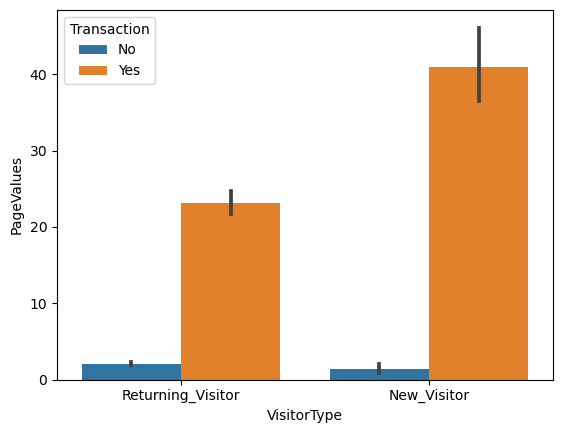

In [19]:
sns.barplot(x='VisitorType', y='PageValues',data=ecom_df,hue='Transaction')

In [20]:
pd.pivot_table(data = ecom_df, values = 'PageValues', index = 'VisitorType', columns = 'Transaction', aggfunc = 'mean',margins=True)

Transaction              No        Yes        All
VisitorType                                      
New_Visitor        1.372776  40.989718  11.126695
Returning_Visitor  2.065076  23.174969   5.006176
All                1.975998  27.264518   5.889258

* **Page Values:**
    * New Visitors who make a purchase visit pages 30x more than those who do not
    * Returning Vistors who make a purchase visit pages 11x more than those who do not 
    * This is reasonable for both New and Returning Visitors, as customers who decide to make a purchase are likely to interact with the website more to discover additional products or answers to questions they may have
    
Let's understand which type of page had a high page value:

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

<Axes: xlabel='Administrative', ylabel='PageValues'>

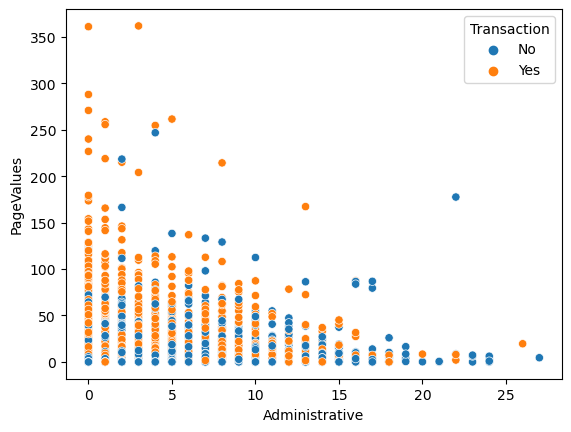

In [21]:
sns.scatterplot(data=ecom_df,x='Administrative',y='PageValues',hue='Transaction')

In [22]:
pd.pivot_table(data = ecom_df, values = 'Administrative', index = 'VisitorType', columns = 'Transaction', aggfunc = 'mean',margins=True)

Transaction              No       Yes       All
VisitorType                                    
New_Visitor        2.594333  2.212329  2.500281
Returning_Visitor  2.047352  3.745578  2.283954
All                2.117732  3.393606  2.315166

* **Administrative Pages:**
    * New Vistors who made a purchase visit administrative pages 15% less than those who do not make a purchase
        * This is interesting, as we would expect that new visitors who made a purchase would visit administrative pages more than those who did not make a purchase
    * Returning Vistors who made a purchase visit administrative pages 1.8x more than those who do not make a purchase 
        * This is reasonable, as customers who have returned and made purchases would view their account, privacy policies etc)

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

<Axes: xlabel='Informational', ylabel='PageValues'>

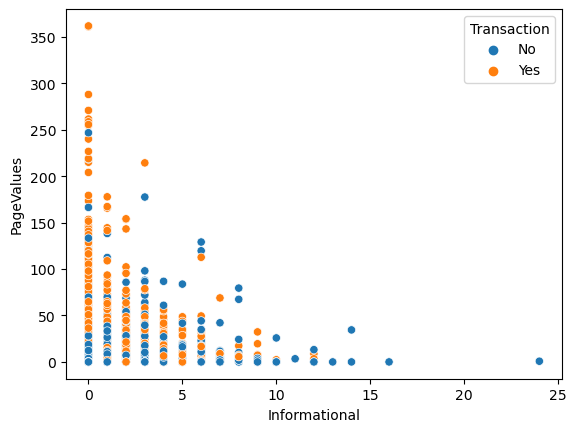

In [23]:
sns.scatterplot(data=ecom_df,x='Informational',y='PageValues',hue='Transaction')

In [24]:
pd.pivot_table(data = ecom_df, values = 'Informational', index = 'VisitorType', columns = 'Transaction', aggfunc = 'mean',margins=True)

Transaction              No       Yes       All
VisitorType                                    
New_Visitor        0.340790  0.280822  0.326026
Returning_Visitor  0.468230  0.936735  0.533504
All                0.451833  0.786164  0.503569

* **Informational Pages:**
    * New Vistors who made a purchase visit informational pages 18% less than those who do not make a purchase
        * This is interesting, as we would expect that new visitors who made a purchase would visit informational pages more than those who did not make a purchase related to customer inquiries
    * Returning Vistors who made a purchase visit informational pages 2x more than those who do not make a purchase 
        * This is reasonable, as customers who have returned and made purchases would view FAQs, contact information for customer related inquiries

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

<Axes: xlabel='ProductRelated', ylabel='PageValues'>

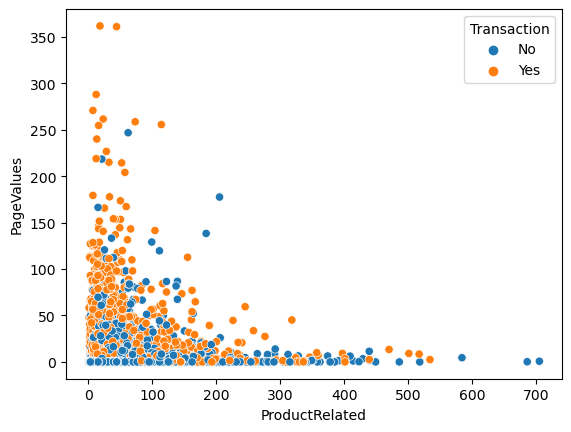

In [25]:
sns.scatterplot(data=ecom_df,x='ProductRelated',y='PageValues',hue='Transaction')

In [26]:
pd.pivot_table(data = ecom_df, values = 'ProductRelated', index = 'VisitorType', columns = 'Transaction', aggfunc = 'mean',margins=True)

Transaction               No        Yes        All
VisitorType                                       
New_Visitor        16.291573  22.369863  17.788083
Returning_Visitor  30.549169  55.909524  34.082457
All                28.714642  48.210168  31.731468

* **Product Related Pages:**
    * New Vistors who made a purchase visit product related pages 1.4x more than those who do not make a purchase
    * Returning Vistors who made a purchase visit product related pages 1.8x more than those who do not make a purchase
    * This is reasonable for both New and Returning Visitors, as customers who decide to make a purchase are likely to interact with product related pages more to browse producs etc

Now, let's review Bounce Rates:

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

<Axes: xlabel='BounceRates', ylabel='Count'>

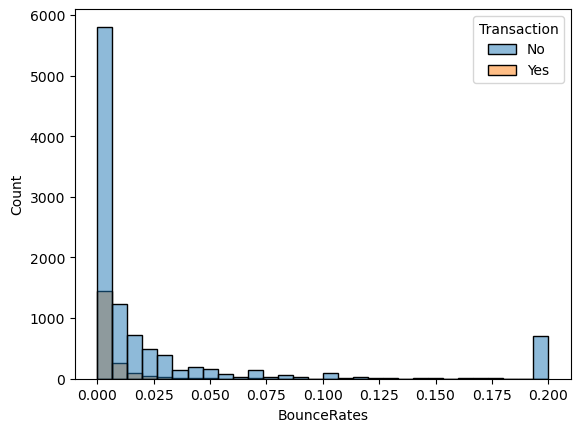

In [27]:
sns.histplot(data=ecom_df, x='BounceRates',hue='Transaction', bins =30)

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

<Axes: xlabel='ExitRates', ylabel='Count'>

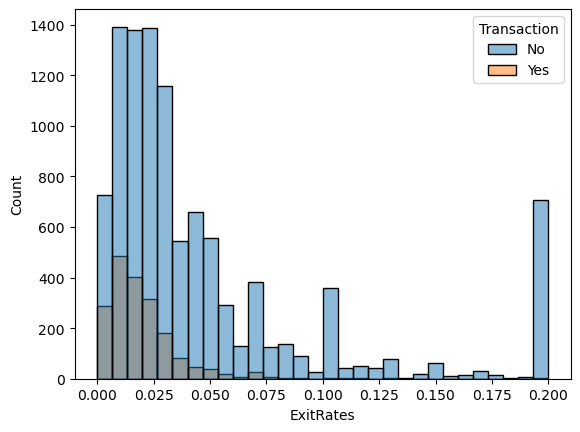

In [28]:
sns.histplot(data=ecom_df, x='ExitRates',hue='Transaction', bins =30)

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

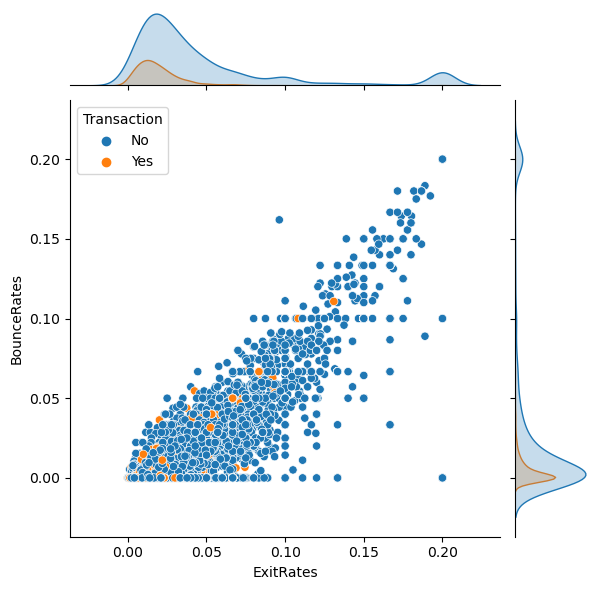

In [29]:
sns.jointplot(data=ecom_df,x='ExitRates',y='BounceRates',hue='Transaction')

### 3. One-Hot Encoding

#### 3.1 Dealing with Categorical Fields
Let's first visually inspect the categorical fields:

In [30]:
ecom_df.select_dtypes(exclude=["int64","float64"])

VisitorType  Weekend Transaction
0      Returning_Visitor    False          No
1      Returning_Visitor    False          No
2      Returning_Visitor    False          No
3      Returning_Visitor    False          No
4      Returning_Visitor     True          No
...                  ...      ...         ...
12325  Returning_Visitor     True          No
12326  Returning_Visitor     True          No
12327  Returning_Visitor     True          No
12328  Returning_Visitor    False          No
12329        New_Visitor     True          No

[12330 rows x 3 columns]

##### 3.1a One-Hot Encoding on Visitor Type

Let's convert the unique categorical values in Visitor Type field, into numeric 1's and 0's:

In [31]:
pd.get_dummies(ecom_df['VisitorType']).corr()

New_Visitor  Returning_Visitor
New_Visitor                1.0               -1.0
Returning_Visitor         -1.0                1.0

In [32]:
ecom_df['VisitorType'] = pd.get_dummies(ecom_df['VisitorType']).iloc[:,1]*1

Let's visualize to ensure the conversion of categorical VisitorType field is now numerical. 

* 1's represents a Returning Visitor
* 0's represents a New Visitor

In [33]:
ecom_df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  VisitorType  Weekend  \
0         0.20       0.20         0.0         0.0            1    False   
1         0.00       0.10         0.0         0.0            1    False   
2         0.20       0.20         0.0         0.0            1    False   
3         0.05       0.14         0.0         0.0            1    False   
4         0.02       0.05         0.0         0.0            1     True   

  Transaction  
0          No  
1          No  
2          No  
3          No  
4          No

##### 3.1b One-Hot Encoding on Weekend

Let's convert the unique categorical values in Weekend field, into numeric 1's and 0's:

In [34]:
pd.get_dummies(ecom_df['Weekend']).corr()

False  True 
False    1.0   -1.0
True    -1.0    1.0

In [35]:
ecom_df['Weekend'] = pd.get_dummies(ecom_df['Weekend']).iloc[:,1]*1

Let's visualize to ensure the conversion of categorical Weekend field is now numerical. 

* 1's represents a Weekend
* 0's represents a Weekday

In [36]:
ecom_df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  VisitorType  Weekend  \
0         0.20       0.20         0.0         0.0            1        0   
1         0.00       0.10         0.0         0.0            1        0   
2         0.20       0.20         0.0         0.0            1        0   
3         0.05       0.14         0.0         0.0            1        0   
4         0.02       0.05         0.0         0.0            1        1   

  Transaction  
0          No  
1          No  
2          No  
3          No  
4          No

##### 3.1c One-Hot Encoding on Transaction

Let's convert the unique categorical values in Transaction field, into numeric 1's and 0's:

In [37]:
pd.get_dummies(ecom_df['Transaction']).corr()

No  Yes
No   1.0 -1.0
Yes -1.0  1.0

In [38]:
ecom_df['Transaction'] = pd.get_dummies(ecom_df['Transaction']).iloc[:,1]*1

Let's visualize to ensure the conversion of categorical Transaction field is now numerical. 

* 1's represents Purchase Made
* 0's represents No Purchase Made

In [39]:
ecom_df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  VisitorType  Weekend  \
0         0.20       0.20         0.0         0.0            1        0   
1         0.00       0.10         0.0         0.0            1        0   
2         0.20       0.20         0.0         0.0            1        0   
3         0.05       0.14         0.0         0.0            1        0   
4         0.02       0.05         0.0         0.0            1        1   

   Transaction  
0            0  
1            0  
2            0  
3            0  
4            0

#### 3.2 Correlation Matrix
Let's create a correlation matrix based on our data now that we have completed One Hot Enconding:

<Axes: >

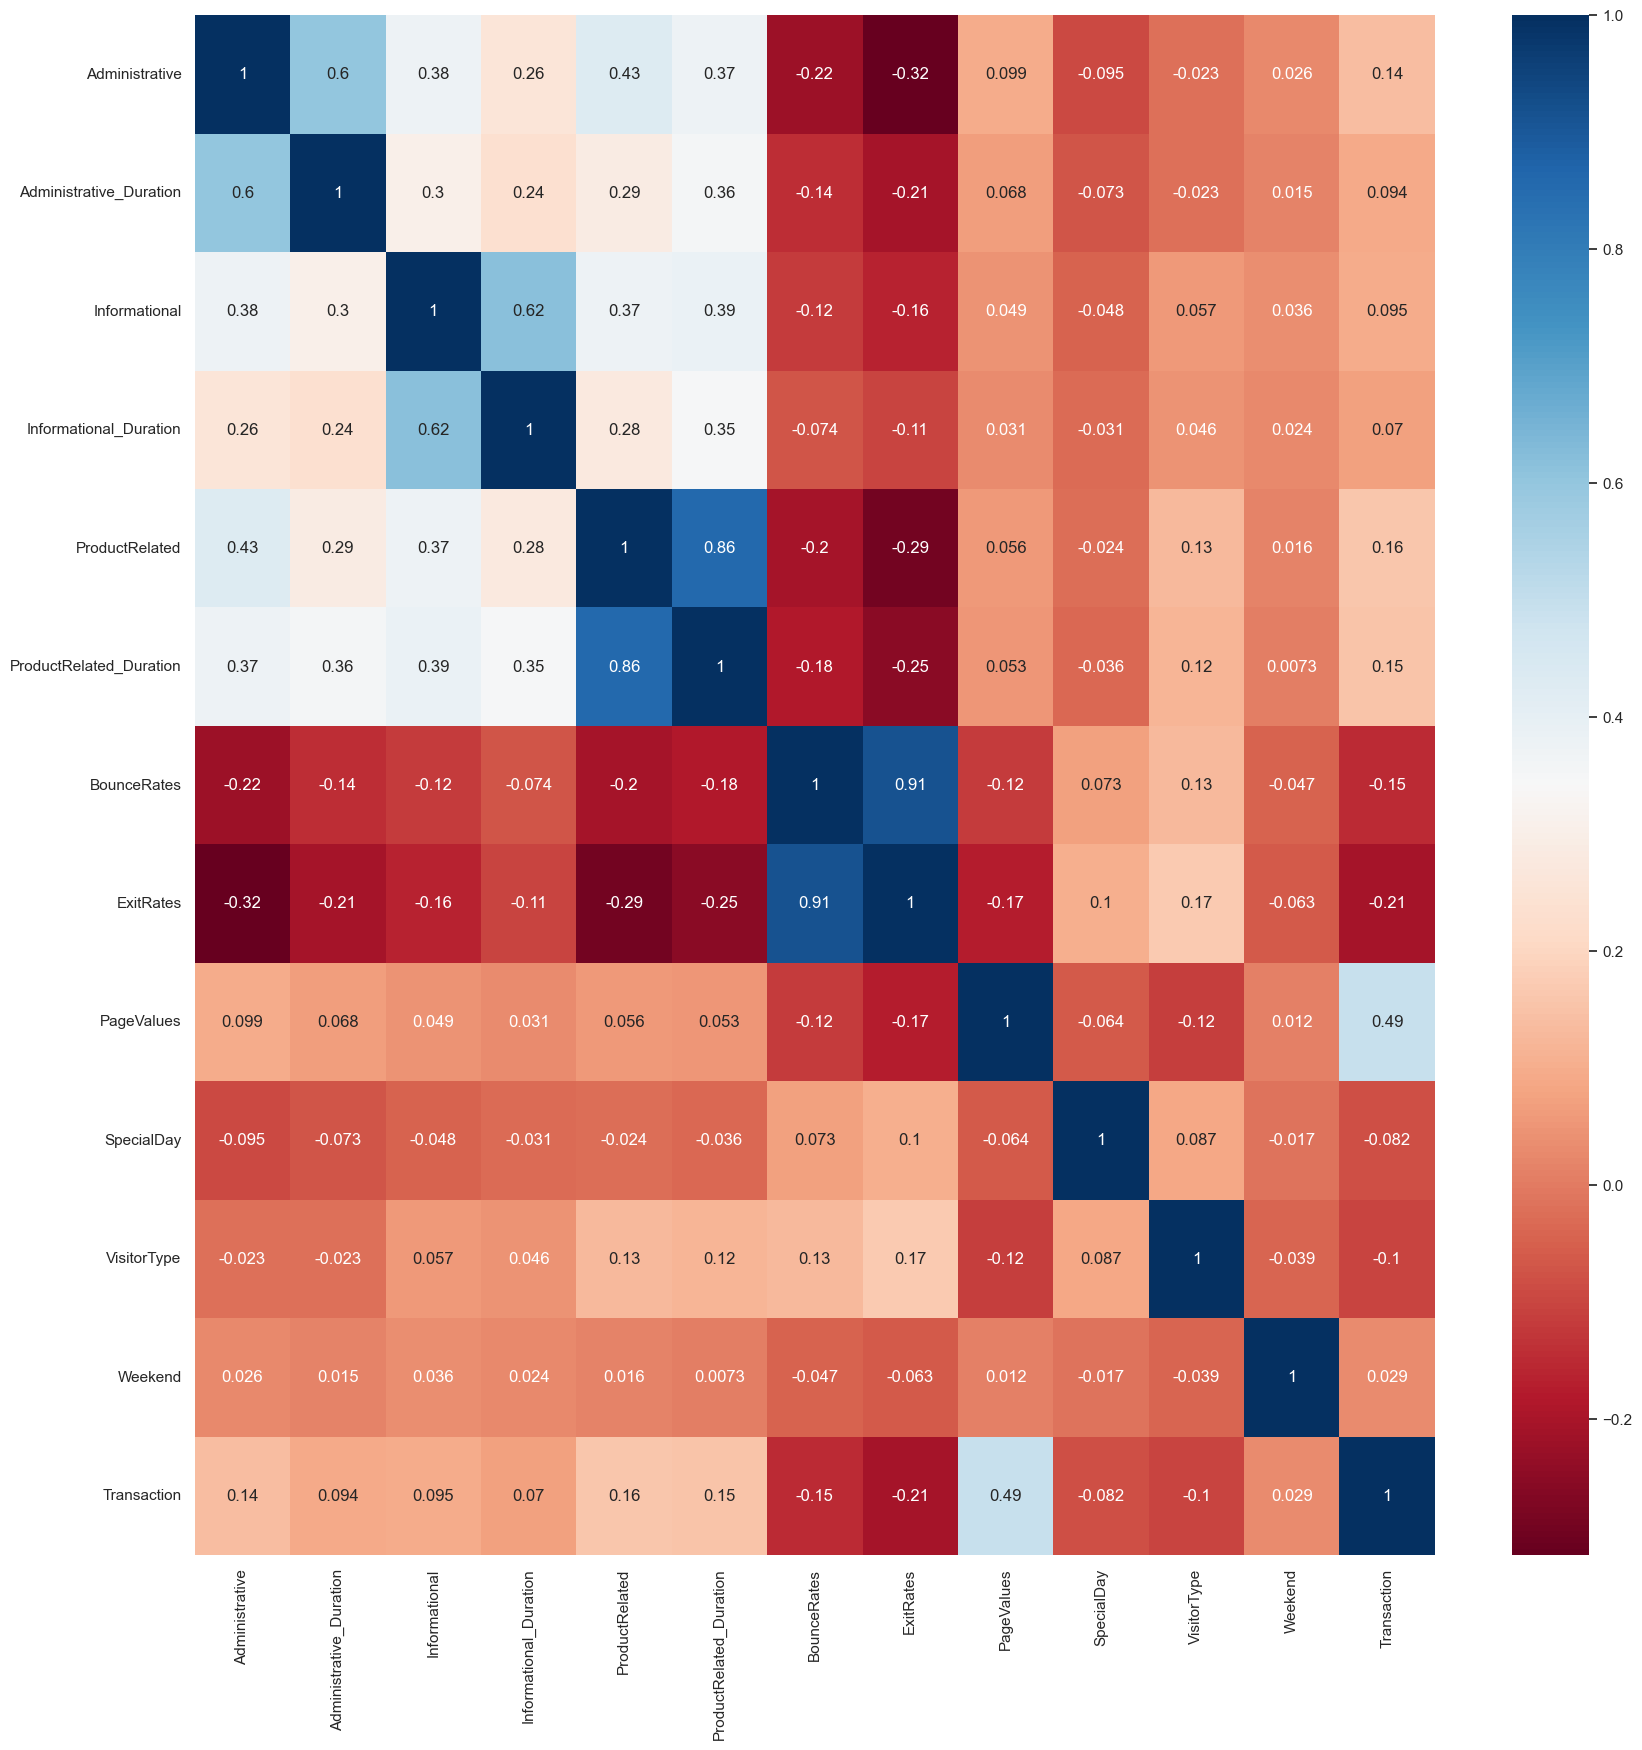

In [40]:
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(ecom_df.corr(numeric_only=True),annot = True, cmap = 'RdBu')

Based on the above correlation matrix, there is strong colinearity between:

* Administrative <=> Administrative Duration
* Informational <=> Informational Duration
* Product Related <=> Product Related Duration
* Bounce Rates <=> Exit Rates

Let's drop Administrative, Informational, Product Related and Bounce Rates. 
* Keeping duration to observe possible insights regarding how the time on website corresponds with transaction trends and the type of pages garnering attention

In [41]:
ecom_red1_df = ecom_df.drop(['Administrative','Informational','ProductRelated',
                        'BounceRates'], axis = 1)

Let's visually inspect our reduced data:

In [42]:
ecom_red1_df.head()

Administrative_Duration  Informational_Duration  ProductRelated_Duration  \
0                      0.0                     0.0                 0.000000   
1                      0.0                     0.0                64.000000   
2                      0.0                     0.0                 0.000000   
3                      0.0                     0.0                 2.666667   
4                      0.0                     0.0               627.500000   

   ExitRates  PageValues  SpecialDay  VisitorType  Weekend  Transaction  
0       0.20         0.0         0.0            1        0            0  
1       0.10         0.0         0.0            1        0            0  
2       0.20         0.0         0.0            1        0            0  
3       0.14         0.0         0.0            1        0            0  
4       0.05         0.0         0.0            1        1            0

Let's create a correlation matrix based on our updated data set:

<Axes: >

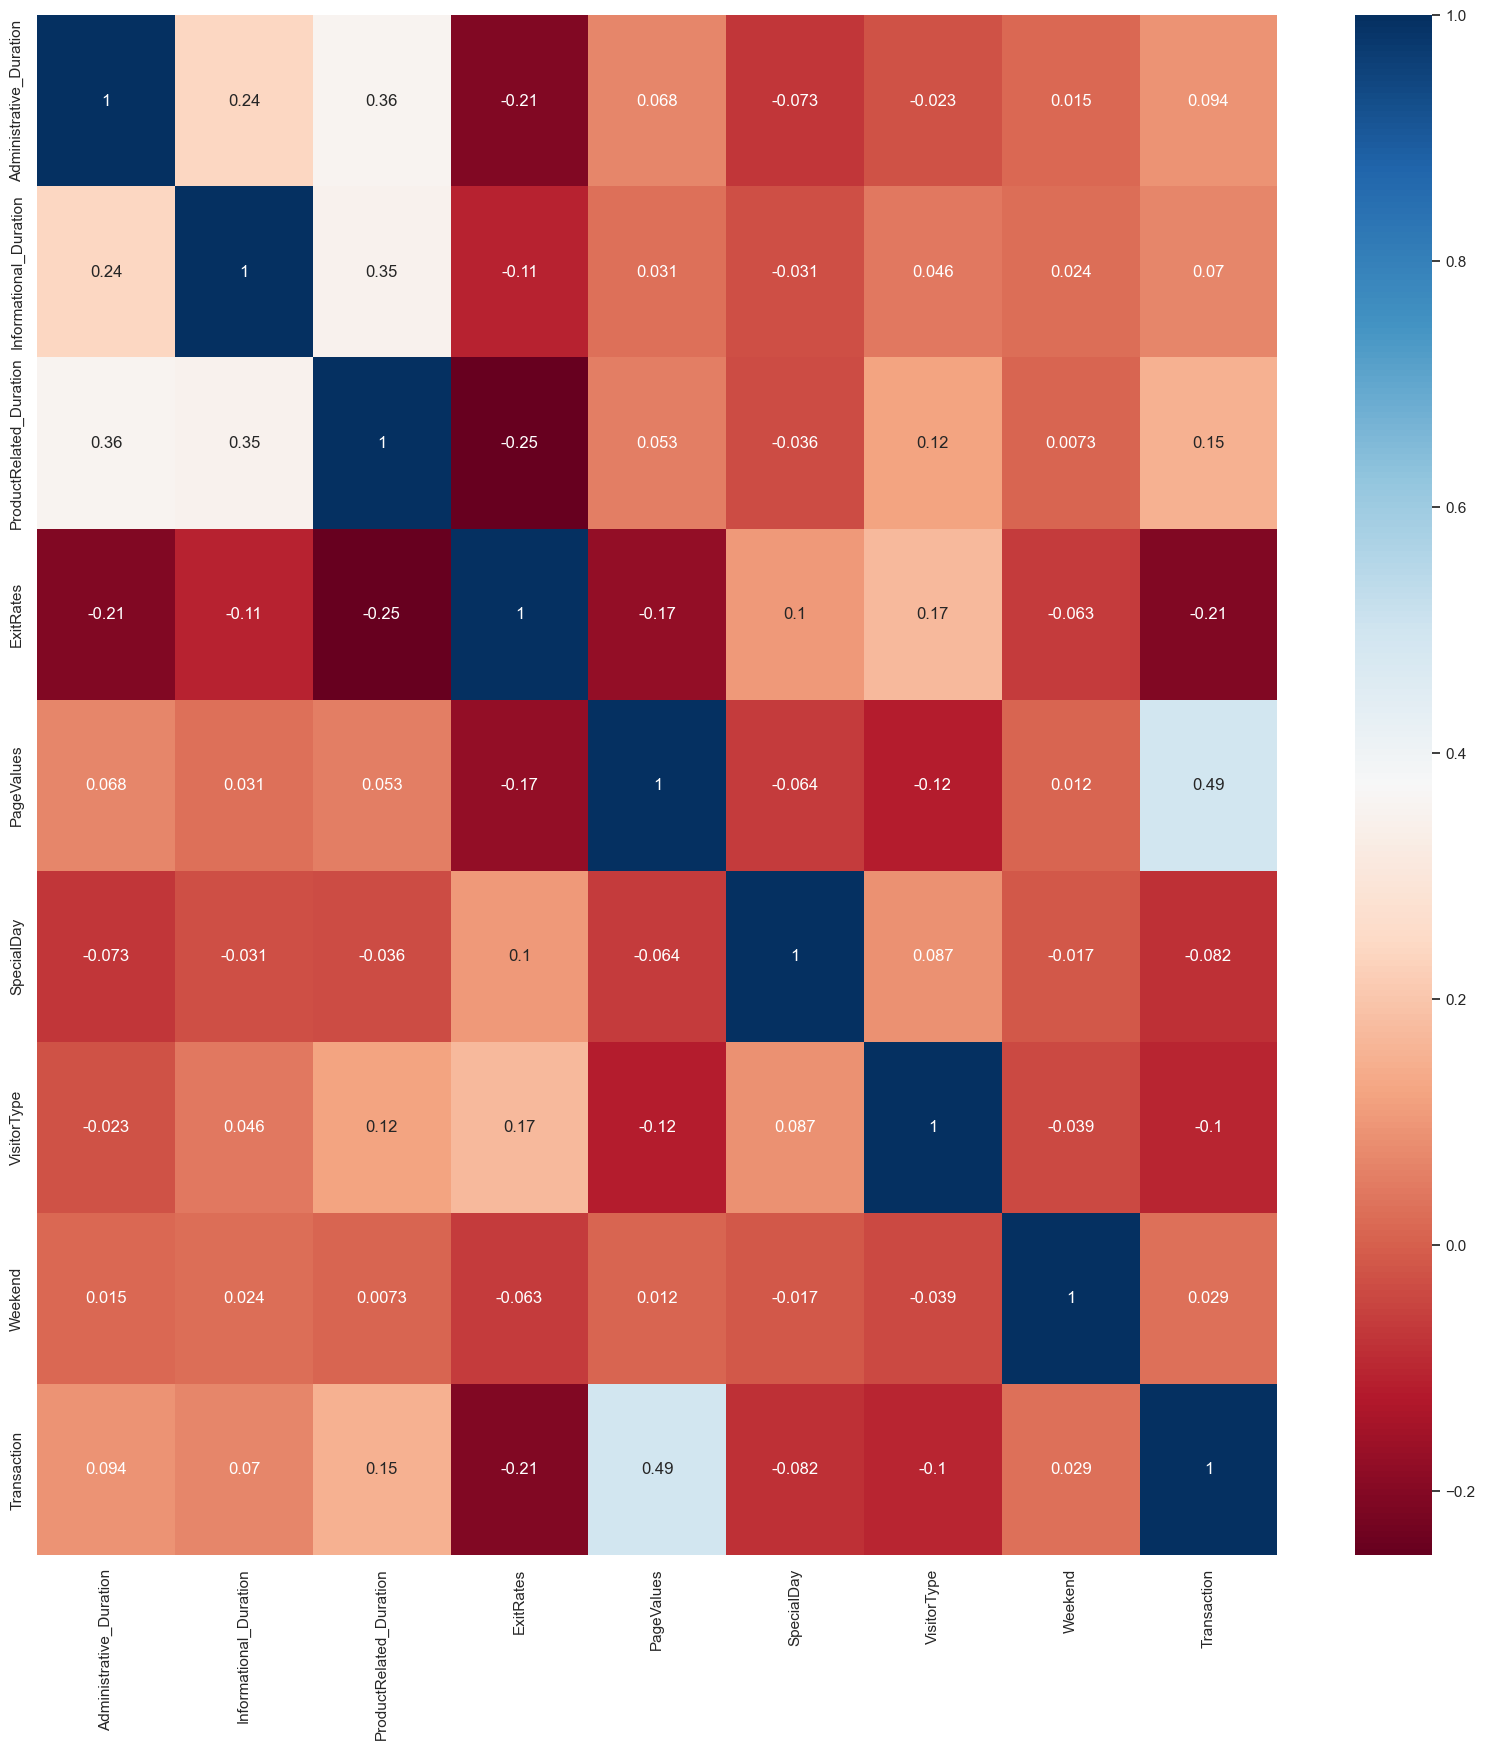

In [43]:
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(ecom_red1_df.corr(numeric_only=True),annot = True, cmap = 'RdBu')

### 4. Train/Test/Split

To prepare our data for Classification Models, let's randomly split our data into 80% training and 20% for testing.

Begin by importing from sklearn:

In [44]:
from sklearn.model_selection import train_test_split

Let's create variables as predicators and target:

In [45]:
X = ecom_red1_df.drop('Transaction', axis = 1)
y = ecom_red1_df['Transaction']

Let's split our data into training and test:

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

### 5. Importing Libraries to Create Our Machine Learning Models

Let's import the below libraries:

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import statsmodels.api as sm
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import normalize

### 6. Logistic Regression Model

#### 6.1 Create the Log Model:

In [48]:
log_reg = LogisticRegression()

Let's fit model into our data:

In [49]:
log_reg.fit(X_train,y_train)

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Let's predict y using our testing data set:

In [50]:
y_train_pred = log_reg.predict(X_train)

In [51]:
y_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
y_train_pred_prob = log_reg.predict_proba(X_train)

In [53]:
y_train_pred_prob

array([[0.94305197, 0.05694803],
       [0.90990877, 0.09009123],
       [0.9464715 , 0.0535285 ],
       ...,
       [0.94226507, 0.05773493],
       [0.90270831, 0.09729169],
       [0.93109097, 0.06890903]])

* Based on above, the first point had a 95% chance of 0 (left side, no purchase), and 5% chance of 1 (right side, purchase). Therefore, it was 0
* Based on the current threshold, under a Logistic Regression, anything >50% will be chosen as 0 (more on this later)

In [54]:
accuracy_score(y_train,y_train_pred)

0.8870640713706407

* Based on above accuracy score, 89% for Training set

Let's predict y using our testing data set:

In [55]:
y_test_pred = log_reg.predict(X_test)

In [56]:
accuracy_score(y_test,y_test_pred)

0.8690186536901865

* Based on above accuracy score, 87% for Testing set

Let's create a Classification Report for our Training Model from sklearn:

In [57]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      8367
           1       0.76      0.38      0.50      1497

    accuracy                           0.89      9864
   macro avg       0.83      0.68      0.72      9864
weighted avg       0.88      0.89      0.87      9864



Let's create a Classification Report for our Testing Model from sklearn:

In [58]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2055
           1       0.73      0.34      0.46       411

    accuracy                           0.87      2466
   macro avg       0.81      0.66      0.69      2466
weighted avg       0.86      0.87      0.85      2466



*Logisitic Regression (Original) Model Performance:*

* Training
    * Accuracy: 89% represents that number of correct predictions made divided by total number of predictions made
    * Precision: Out of all the visitors that the model predicted would make a purchase, 76% actually did.
    * Recall: Out of all the visitors that actually did make a purchase, the model predicted this outcome correctly for only 38% of those visitors.
        * Based on the low recall, we will have to adjust our **Probability threshold value** of 50% (later on)

* Test
    * Accuracy: 87% represents that number of correct predictions made divided by total number of predictions made
    * Precision: Out of all the visitors that the model predicted would make a purchase, 73% actually did.
    * Recall: Out of all the visitors that actually did make a purchase, the model predicted this outcome correctly for only 34% of those visitors.
        * Based on the low recall, we will have to adjust our **Probability threshold value** of 50% (later on)
    
* Over/Underfitting
    * As a result of the accuracy scores being similar, there appears to be no overfitting
    
*Summary of Logisitic Regression (Original) Model*
    
Let's create a Summary of our Model using the StatsModel api below:

In [59]:
log_reg_sm = sm.GLM(y_train, sm.add_constant(X_train),family=sm.families.Binomial()).fit()

In [60]:
log_reg_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Transaction   No. Observations:                 9864
Model:                            GLM   Df Residuals:                     9855
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2921.8
Date:                Tue, 05 Dec 2023   Deviance:                       5843.5
Time:                        14:35:17   Pearson chi2:                 4.09e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2283
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.7688      0.095    -18.597      0.000      -1.955      -1.582
Administrative_Duration    -0.0002      0.000     -1.107      0.268      -0.001       0.000
Informational_Duration      0.0001      0.000      0.487      0.626      -0.000       0.001
ProductRelated_Duration     0.0001   1.62e-05      8.150      0.000       0.000       0.000
ExitRates                 -18.2649      1.850     -9.873      0.000     -21.891     -14.639
PageValues                  0.0797      0.003     30.551      0.000       0.075       0.085
SpecialDay                 -1.1665      0.270     -4.315      0.000      -1.696      -0.637
VisitorType                -0.3072      0.093     -3.291      0.001      -0.490      -0.124
Weekend                     0.1399      0.079      1.767      0.077      -0.015       0.295
===========================================================================================
"""

* P-Value is a statistical measure that helps us determine whether the relationship we are observing in our training sample exists in the larger population. A low P-value, usually less than 5%, indicates the variable has a significant impact on the predicator. Whereas a high P-value, indicates a low impact on the predicator. 
* Based on our Summary above, the following predictors have a low impact on our predicator (Transaction):
    * Informational Duration
    * Administrative Duration
    * Weekend
    
#### 6.2 Improving Our Logistic Regression Model

Let's now focus on reducing our model by removing the predictors high p-values (one at a time).

#### 6.2a Remove Information Duration Predicator

Let's remove Informational Duration predicator, as it had the highest p-value:

In [61]:
ecom_red2_df = ecom_red1_df.drop(['Informational_Duration'], axis = 1)

Let's now create the reduce model and check its performance:

In [62]:
X_train_reduced = X_train.drop(['Informational_Duration'], axis = 1)
X_test_reduced = X_test.drop(['Informational_Duration'], axis = 1)

log_reg__sm_reduced = sm.GLM(y_train, sm.add_constant(X_train_reduced),family=sm.families.Binomial()).fit()

y_train_reducedmodel_predicted_proba = log_reg__sm_reduced.predict(sm.add_constant(X_train_reduced))
y_test_reducedmodel_predicted_proba = log_reg__sm_reduced.predict(sm.add_constant(X_test_reduced))

y_train_reducedmodel_predicted = np.where(y_train_reducedmodel_predicted_proba >= .5, 1, 0)
y_test_reducedmodel_predicted = np.where(y_test_reducedmodel_predicted_proba >= .5, 1, 0)

In [63]:
log_reg__sm_reduced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Transaction   No. Observations:                 9864
Model:                            GLM   Df Residuals:                     9856
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2921.9
Date:                Tue, 05 Dec 2023   Deviance:                       5843.8
Time:                        14:35:17   Pearson chi2:                 4.15e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2282
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.7696      0.095    -18.607      0.000      -1.956      -1.583
Administrative_Duration    -0.0002      0.000     -1.060      0.289      -0.001       0.000
ProductRelated_Duration     0.0001   1.58e-05      8.487      0.000       0.000       0.000
ExitRates                 -18.2695      1.850     -9.877      0.000     -21.895     -14.644
PageValues                  0.0798      0.003     30.575      0.000       0.075       0.085
SpecialDay                 -1.1676      0.270     -4.319      0.000      -1.697      -0.638
VisitorType                -0.3056      0.093     -3.275      0.001      -0.488      -0.123
Weekend                     0.1412      0.079      1.784      0.074      -0.014       0.296
===========================================================================================
"""

* Based on our reduced model, the Pseudo R-sq and Log-Likelihood stay relatively the same (which is good, we are maintaining accuracy while simplifying our model)

#### 6.2b Remove Administrative Duration Predicator

Now, let's remove the Administrative Duration predicator, as it had the highest p-value:

In [64]:
ecom_red3_df = ecom_red2_df.drop(['Administrative_Duration'], axis = 1)

Let's now create the new reduce model and check its performance:

In [65]:
X_train_reduced2 = X_train_reduced.drop(['Administrative_Duration'], axis = 1)
X_test_reduced2 = X_test_reduced.drop(['Administrative_Duration'], axis = 1)

log_reg__sm_reduced2 = sm.GLM(y_train, sm.add_constant(X_train_reduced2),family=sm.families.Binomial()).fit()

y_train_reduced2model_predicted_proba = log_reg__sm_reduced2.predict(sm.add_constant(X_train_reduced2))
y_test_reduced2model_predicted_proba = log_reg__sm_reduced2.predict(sm.add_constant(X_test_reduced2))

y_train_reduced2model_predicted = np.where(y_train_reduced2model_predicted_proba >= .5, 1, 0)
y_test_reduced2model_predicted = np.where(y_test_reduced2model_predicted_proba >= .5, 1, 0)

In [66]:
log_reg__sm_reduced2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Transaction   No. Observations:                 9864
Model:                            GLM   Df Residuals:                     9857
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2922.5
Date:                Tue, 05 Dec 2023   Deviance:                       5844.9
Time:                        14:35:17   Pearson chi2:                 4.09e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2281
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.7881      0.094    -19.120      0.000      -1.971      -1.605
ProductRelated_Duration     0.0001   1.52e-05      8.492      0.000    9.94e-05       0.000
ExitRates                 -18.0866      1.838     -9.841      0.000     -21.689     -14.484
PageValues                  0.0796      0.003     30.619      0.000       0.075       0.085
SpecialDay                 -1.1606      0.270     -4.296      0.000      -1.690      -0.631
VisitorType                -0.3038      0.093     -3.258      0.001      -0.487      -0.121
Weekend                     0.1416      0.079      1.790      0.074      -0.013       0.297
===========================================================================================
"""

* Based on our reduced model, the Pseudo R-sq and Log-Likelihood stay relatively the same (which is good, we are maintaining accuracy while simplifying our model

#### 6.2c Remove Weekend Predictor

Now, let's remove the Weekend predictor, as it had the highest p-value:

In [67]:
ecom_red4_df = ecom_red3_df.drop(['Weekend'], axis = 1)

Let's now create the new reduce model and check its performance:

In [68]:
X_train_reduced3 = X_train_reduced2.drop(['Weekend'], axis = 1)
X_test_reduced3 = X_test_reduced2.drop(['Weekend'], axis = 1)

log_reg__sm_reduced3 = sm.GLM(y_train, sm.add_constant(X_train_reduced3),family=sm.families.Binomial()).fit()

y_train_reduced3model_predicted_proba = log_reg__sm_reduced3.predict(sm.add_constant(X_train_reduced3))
y_test_reduced3model_predicted_proba = log_reg__sm_reduced3.predict(sm.add_constant(X_test_reduced3))

y_train_reduced3model_predicted = np.where(y_train_reduced3model_predicted_proba >= .5, 1, 0)
y_test_reduced3model_predicted = np.where(y_test_reduced3model_predicted_proba >= .5, 1, 0)

In [69]:
log_reg__sm_reduced3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Transaction   No. Observations:                 9864
Model:                            GLM   Df Residuals:                     9858
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2924.0
Date:                Tue, 05 Dec 2023   Deviance:                       5848.1
Time:                        14:35:17   Pearson chi2:                 4.03e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2279
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.7431      0.090    -19.405      0.000      -1.919      -1.567
ProductRelated_Duration     0.0001   1.52e-05      8.470      0.000     9.9e-05       0.000
ExitRates                 -18.2228      1.839     -9.907      0.000     -21.828     -14.618
PageValues                  0.0794      0.003     30.598      0.000       0.074       0.085
SpecialDay                 -1.1794      0.272     -4.344      0.000      -1.712      -0.647
VisitorType                -0.3090      0.093     -3.316      0.001      -0.492      -0.126
===========================================================================================
"""

* Based on our new reduced model, we have been able to slightly reduce both the Pseudo R-sq and Log-Likelihood; this is great!

Let's check the accuracy score and classification report of the new reduced model:

In [70]:
print('Accuracy score for the training set in reducted model is: ', accuracy_score(y_train, y_train_reduced3model_predicted))
print('Accuracy score for the test set in reducted model is: ', accuracy_score(y_test, y_test_reduced3model_predicted))

Accuracy score for the training set in reducted model is:  0.8877737226277372
Accuracy score for the test set in reducted model is:  0.8706407137064072


In [71]:
print('Classification report for the training set is: ', '\n' , classification_report(y_train, y_train_reduced3model_predicted), '\n')
print('Classification report for the test set is: ', '\n', classification_report(y_test, y_test_reduced3model_predicted))

Classification report for the training set is:  
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      8367
           1       0.76      0.38      0.51      1497

    accuracy                           0.89      9864
   macro avg       0.83      0.68      0.72      9864
weighted avg       0.88      0.89      0.87      9864
 

Classification report for the test set is:  
               precision    recall  f1-score   support

           0       0.88      0.98      0.93      2055
           1       0.74      0.34      0.47       411

    accuracy                           0.87      2466
   macro avg       0.81      0.66      0.70      2466
weighted avg       0.86      0.87      0.85      2466



*Logisitic Regression (Reduced) Model Performance:*

* Training
    * Accuracy: Remains the same as our original model. 89% represents that number of correct predictions made divided by total number of predictions made
    * Precision: Remains the same as our original model. Out of all the visitors that the model predicted would make a purchase, 76% actually did.
    * Recall: Remains the same as our original model. Out of all the visitors that actually did make a purchase, the model predicted this outcome correctly for only 38% of those visitors.
        * Based on the low recall, we will have to adjust our **Probability threshold value** of 50% (later on)

* Test
    * Accuracy: Remains the same as our original model. 87% represents that number of correct predictions made divided by total number of predictions made
    * Precision: Improves by 1% from our original model. Out of all the visitors that the model predicted would make a purchase, 74% actually did.
    * Recall: Remains the same as our original model. Out of all the visitors that actually did make a purchase, the model predicted this outcome correctly for only 34% of those visitors.
        * Based on the low recall, we will have to adjust our **Probability threshold value** of 50% (later on)

Let's use the Reduced Model going forward. It is a simplier model compared to our full model, but provides us the same accuracy and recall score, as well as a 1% improvement in precision (testing set).

#### 6.3 Logisitic Regression Update Probability Threshold

Recall from section 7.1-7.2 above, that the current Logistic Regression probability threshold is 50%. What this means is:
* If a website visitor has at least a 50% predicated chance of making a transaction, it will be classified as Yes for Transaction.

The selection of the threshold can change the behaviour of the model towards having better accuracy on negative results or positive results.
* Based on our low recall accuracy, currently the model is predicting less visitors making a purchase when in reality they do (ie. more false negatives)
* In this situation, a lower probability threshold would force the model predict more visitors making transactions. We would have to sacrifice our precision accuracy (trade-off)
    * The ability to accurately predict customers who will make a purchase is critical, as our objective is to segment and address Clifford's customers with a targeted approach.

Based on trial/error, moving probability threshold down to 25% provides a good balance of improved recall that offsets the reduced precision:

In [72]:
y_train_reduced3model_predicted_t25 = np.where(y_train_reduced3model_predicted_proba >= .25, 1, 0)
y_test_reduced3model_predicted_t25 = np.where(y_test_reduced3model_predicted_proba >= .25, 1, 0)

In [73]:
print('Classification report for the training set with .25 threshold is:', '\n' , classification_report(y_train, y_train_reduced3model_predicted_t25), '\n')
print('Classification report for the test set with .25 threshold is: ', '\n', classification_report(y_test, y_test_reduced3model_predicted_t25))

Classification report for the training set with .25 threshold is: 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      8367
           1       0.66      0.58      0.62      1497

    accuracy                           0.89      9864
   macro avg       0.79      0.76      0.78      9864
weighted avg       0.89      0.89      0.89      9864
 

Classification report for the test set with .25 threshold is:  
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      2055
           1       0.68      0.54      0.60       411

    accuracy                           0.88      2466
   macro avg       0.80      0.75      0.77      2466
weighted avg       0.87      0.88      0.88      2466



Based on the above:

*Logisitic Regression (Reduced & New Threshold) Model Performance:*

* Training
    * Accuracy: Remains the same as our reduced model. 89% represents that number of correct predictions made divided by total number of predictions made
    * Precision: Is worse by 10% from our reduced model. Out of all the visitors that the model predicted would make a purchase, 66% actually did.
    * Recall: Improves by 20% from our reduced model. Out of all the visitors that actually did make a purchase, the model predicted this outcome correctly for only 58% of those visitors.

* Test
    * Accuracy: Improves by 1% from our reduced model. 88% represents that number of correct predictions made divided by total number of predictions made
    * Precision: Is worse by 6% from our reduced model. Out of all the visitors that the model predicted would make a purchase, 68% actually did.
    * Recall: Improves by 20% from our reduced model. Out of all the visitors that actually did make a purchase, the model predicted this outcome correctly for only 54% of those visitors.

Let's use the Reduced Model with the lower probability threshold going forward. It is a simplier model compared to our full model, but provides us the a slightly improved accuracy (testing) and the improvement of the recall score is greater than the weaknesses in precision.

In [74]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [75]:
full_dt = DecisionTreeClassifier(random_state = 1)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2, random_state = 42)

In [77]:
full_dt = DecisionTreeClassifier(random_state = 1)

In [78]:
full_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [79]:
y_train_predicted = full_dt.predict(X_train)
y_test_predicted = full_dt.predict(X_test)

In [80]:
print('Accuracy in train set is: ', accuracy_score(y_train,y_train_predicted))
print('Accuracy in test set is: ', accuracy_score(y_test,y_test_predicted))

Accuracy in train set is:  0.9996958637469586
Accuracy in test set is:  0.8544201135442011


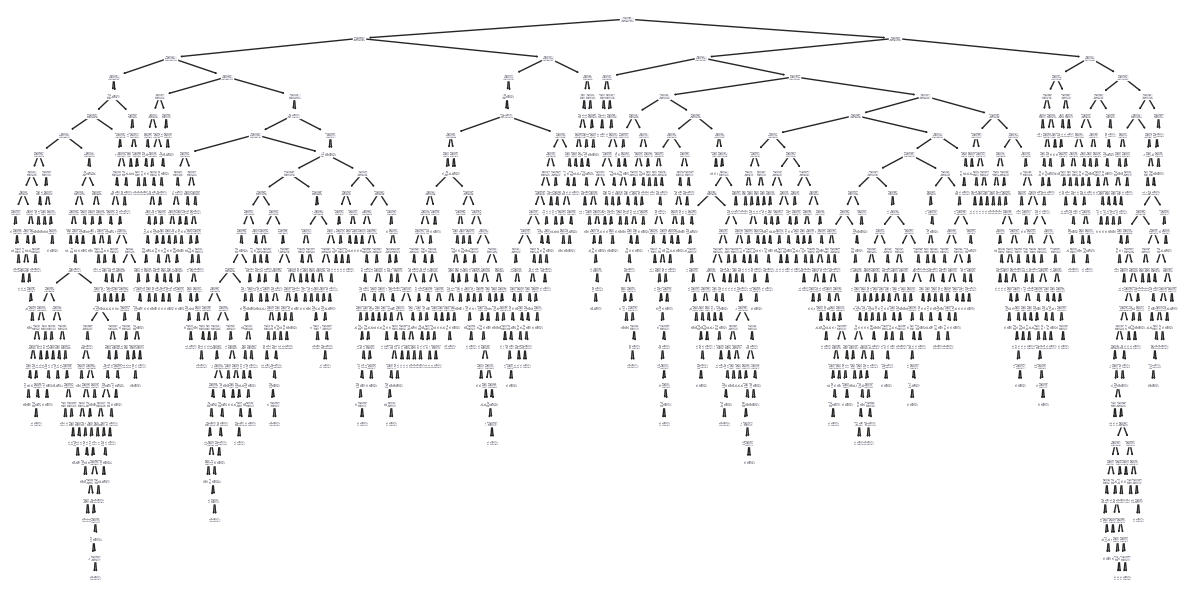

In [81]:
plt.figure(figsize = (15,7.5))
plot_tree(full_dt)
plt.show()

## Creating tree with level 4 depth

In [82]:
dt2 = DecisionTreeClassifier(random_state = 1, max_depth = 4)
dt2.fit(X_train, y_train)
y_train_predicted = dt2.predict(X_train)
y_test_predicted = dt2.predict(X_test)
print('Accuracy in train set is: ', accuracy_score(y_train,y_train_predicted))
print('Accuracy in test set is: ', accuracy_score(y_test,y_test_predicted))

Accuracy in train set is:  0.8987226277372263
Accuracy in test set is:  0.8795620437956204


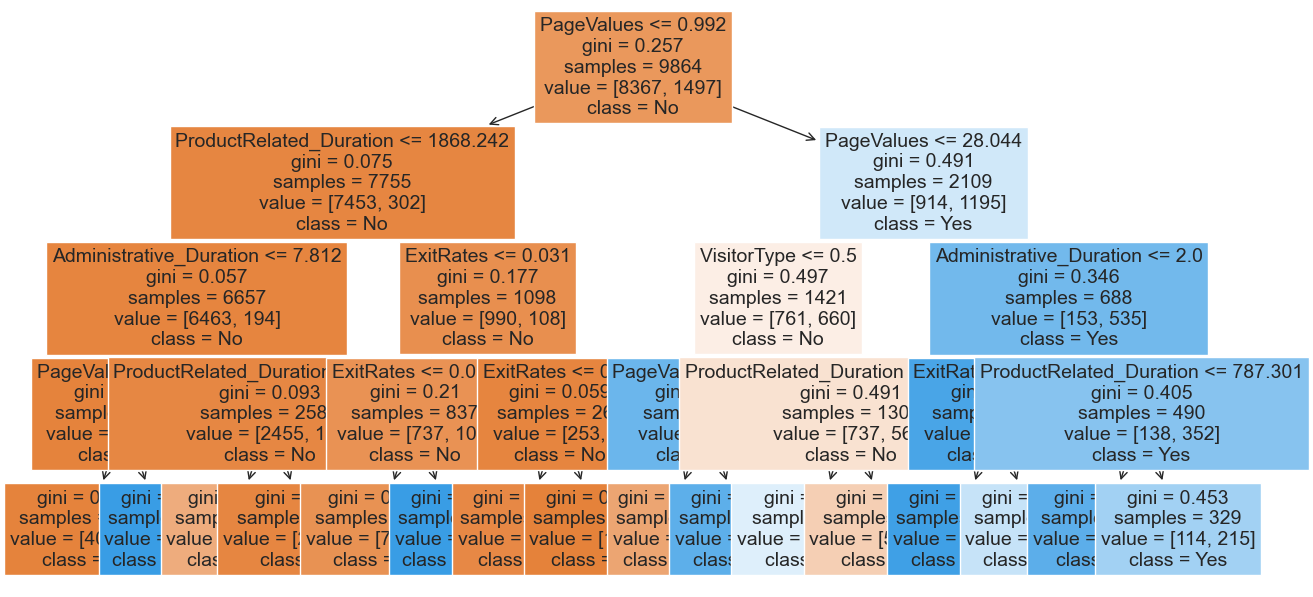

In [83]:
plt.figure(figsize = (15,7.5))
plot_tree(dt2, feature_names = list(X_train.columns), filled = True, class_names = ['No', 'Yes'], fontsize = 14)
plt.show()

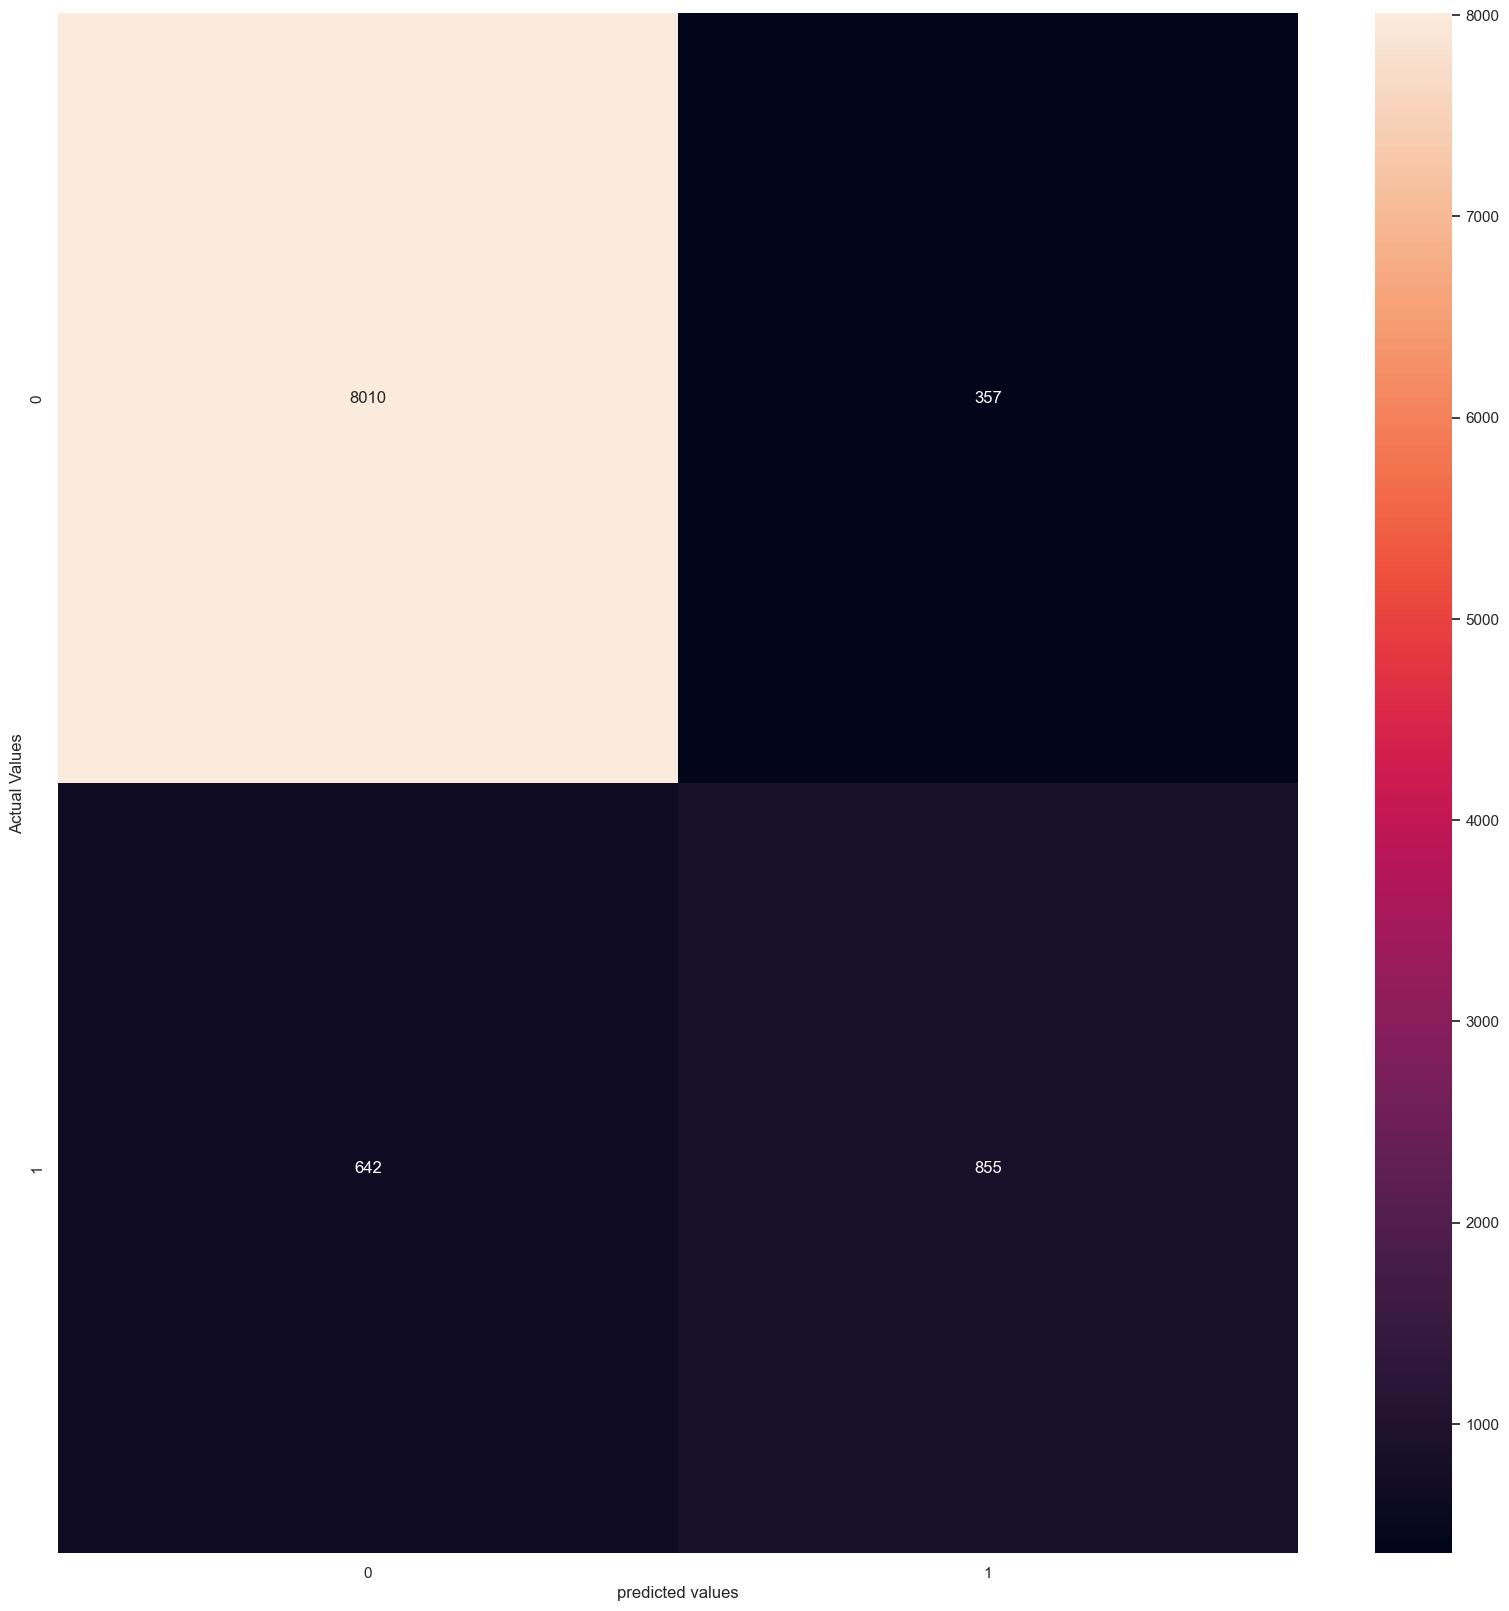

In [84]:
sns.heatmap(confusion_matrix(y_train, y_train_predicted), annot = True, fmt = 'g')
plt.xlabel('predicted values')
plt.ylabel('Actual Values')
plt.show()

In [85]:
dt2.feature_importances_

array([0.01358314, 0.        , 0.03623531, 0.01151819, 0.9128211 ,
       0.        , 0.02584226, 0.        ])

In [86]:
X_train.columns

Index(['Administrative_Duration', 'Informational_Duration',
       'ProductRelated_Duration', 'ExitRates', 'PageValues', 'SpecialDay',
       'VisitorType', 'Weekend'],
      dtype='object')

In [87]:
pd.DataFrame({'feature':X_train.columns, 'Importance':dt2.feature_importances_})

feature  Importance
0  Administrative_Duration    0.013583
1   Informational_Duration    0.000000
2  ProductRelated_Duration    0.036235
3                ExitRates    0.011518
4               PageValues    0.912821
5               SpecialDay    0.000000
6              VisitorType    0.025842
7                  Weekend    0.000000

### 7. K Nearest Neighbors Model

#### 7.1 Create KNN Model:

The range of values within numerical fields differs considerably. We will **Scale our Data**, to ensure our machine learning models (KNN) do not create unreasonably large/small coefficients due to the presence of large/small outliers in the data.

Let's import the StandardScaler from sklearn:

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [90]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [91]:
accuracy_df = pd.DataFrame({'n_value':[], 'a_train':[], 'a_test':[]})

for i in range(1,51):
    kn = KNeighborsClassifier(n_neighbors = i)
    kn.fit(X_train_scaled , y_train)
    y_train_predicted = kn.predict(X_train_scaled)
    y_test_predicted = kn.predict(X_test_scaled)
    a_train = accuracy_score(y_train, y_train_predicted)
    a_test = accuracy_score(y_test, y_test_predicted)
    temp_accuracy_df = pd.DataFrame({'n_value':[i], 'a_train':[a_train], 'a_test':[a_test]})
    accuracy_df = pd.concat([accuracy_df, temp_accuracy_df], axis = 0)

In [92]:
fig2 = px.line(accuracy_df,  x = 'n_value', y = ['a_train','a_test'], template = 'simple_white')
fig2.show()

In [93]:
kn9 = KNeighborsClassifier(n_neighbors = 9)
kn9.fit(X_train_scaled , y_train)
y_train_predicted = kn9.predict(X_train_scaled)
y_test_predicted = kn9.predict(X_test_scaled)

print('Classification report for the training set with KNN model (9 neighbors): ', '\n' , 
      classification_report(y_train, y_train_predicted), '\n')

print('Classification report for the test set with KNN model (9 neighbors):  ', '\n', 
      classification_report(y_test, y_test_predicted))

Classification report for the training set with KNN model (9 neighbors):  
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      8367
           1       0.78      0.56      0.65      1497

    accuracy                           0.91      9864
   macro avg       0.85      0.76      0.80      9864
weighted avg       0.90      0.91      0.90      9864
 

Classification report for the test set with KNN model (9 neighbors):   
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      2055
           1       0.72      0.49      0.58       411

    accuracy                           0.88      2466
   macro avg       0.81      0.73      0.76      2466
weighted avg       0.87      0.88      0.87      2466



In [94]:
accuracy_score(y_train, y_train_predicted)

0.9085563665855637

### 9. K-Means Model

#### 9.1 Create K-Means Model:

For clustering, let's use our original data set:

In [95]:
ecom_df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  VisitorType  Weekend  \
0         0.20       0.20         0.0         0.0            1        0   
1         0.00       0.10         0.0         0.0            1        0   
2         0.20       0.20         0.0         0.0            1        0   
3         0.05       0.14         0.0         0.0            1        0   
4         0.02       0.05         0.0         0.0            1        1   

   Transaction  
0            0  
1            0  
2            0  
3            0  
4            0

The range of values within numerical fields differs considerably. Similar to KNN, we will **Scale our Data**, to ensure our machine learning model does not create unreasonably large/small coefficients due to the presence of large/small outliers in the data.

Let's use the Normalized approach:

In [96]:
ecom_df_scaled = normalize(ecom_df)

In [97]:
ecom_df_scaled

array([[0.        , 0.        , 0.        , ..., 0.69337525, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.01561545, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.69337525, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00542437, 0.00542437,
        0.        ],
       [0.01128742, 0.21163907, 0.        , ..., 0.00282185, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.04654603,
        0.        ]])

Let's first make the assumption of 2 clusters (those who buy vs those who do not):

In [98]:
km = KMeans(n_clusters = 2, random_state = 0, n_init = 'auto')

In [99]:
km.fit(ecom_df_scaled)

KMeans(n_clusters=2, n_init='auto', random_state=0)

In [100]:
km.predict(ecom_df_scaled)

array([1, 0, 1, ..., 0, 0, 0], dtype=int32)

In [101]:
cluster_assignments = km.labels_

In [102]:
ecom_df['Cluster'] = cluster_assignments

In [103]:
ecom_df

Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000   
2                         0.0               1                 0.000000   
3                         0.0               2                 2.666667   
4                         0.0              10               627.500000   
...                       ...             ...                      ...   
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay  VisitorType  Weekend  \
0         0.200000   0.200000    0.000000         0.0            1        0   
1         0.000000   0.100000    0.000000         0.0            1        0   
2         0.200000   0.200000    0.000000         0.0            1        0   
3         0.050000   0.140000    0.000000         0.0            1        0   
4         0.020000   0.050000    0.000000         0.0            1        1   
...            ...        ...         ...         ...          ...      ...   
12325     0.007143   0.029031   12.241717         0.0            1        1   
12326     0.000000   0.021333    0.000000         0.0            1        1   
12327     0.083333   0.086667    0.000000         0.0            1        1   
12328     0.000000   0.021053    0.000000         0.0            1        0   
12329     0.000000   0.066667    0.000000         0.0            0        1   

       Transaction  Cluster  
0                0        1  
1                0        0  
2                0        1  
3                0        0  
4                0        0  
...            ...      ...  
12325            0        0  
12326            0        0  
12327            0        0  
12328            0        0  
12329            0        0  

[12330 rows x 14 columns]

In [104]:
km.cluster_centers_

array([[4.23839108e-03, 1.06840731e-01, 6.03192055e-04, 2.63004184e-02,
        4.03262232e-02, 9.57686724e-01, 1.08594364e-04, 3.50394667e-04,
        9.06709162e-03, 4.59170658e-04, 4.31791070e-03, 1.02902489e-03,
        3.23865781e-04],
       [1.26118004e-02, 8.82484503e-03, 5.69906074e-03, 9.36487978e-03,
        7.04435119e-01, 4.16135285e-03, 1.17215270e-01, 1.19499655e-01,
        5.20417043e-18, 3.07893141e-02, 5.46809684e-01, 9.31099219e-02,
        1.95343710e-03]])

In [105]:
km.inertia_

923.004690707081

#### 9.2 Elbow Method - Optimal Clusters

Let's determine the optimal number of Clusters using the elbow method:

In [106]:
inertia = []
number_of_clusters = range(1,16)

for i in number_of_clusters:
    km = KMeans(n_clusters = i, random_state = 0, n_init = 'auto')
    km.fit(ecom_df_scaled)
    inertia.append(km.inertia_)

In [107]:
inertia

[2101.381538578352,
 923.004690707081,
 468.5375437441302,
 367.34913147440443,
 280.48610318880833,
 247.33538578650106,
 214.4897488484924,
 188.37601286850887,
 165.88168480172405,
 148.70447207625134,
 139.0706635860658,
 130.19570563442682,
 122.57457073044787,
 111.36423162742719,
 103.17760303009689]

Text(0, 0.5, 'Inertia')

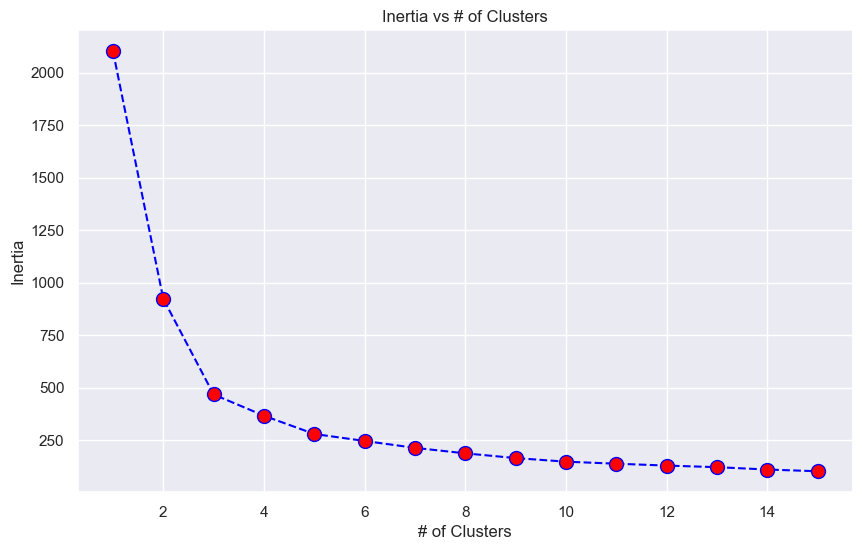

In [108]:
plt.figure(figsize=(10,6))
plt.plot(range(1,16),inertia,color='blue',linestyle = '--',marker ='o', markerfacecolor ='red',markersize=10)
plt.title('Inertia vs # of Clusters')
plt.xlabel('# of Clusters')
plt.ylabel('Inertia')

* The optimal number of clusters is 3, a relatively inertia.
    * Although increasing cluster provides a smaller inertia, the incremental reduction is not worth increasing the size of our model

#### 9.3 KMeans Model - With Optimal Clusters

Let's re-run our KMeans model, using 3 clusters:

In [109]:
km = KMeans(n_clusters = 3, random_state = 0, n_init = 'auto')

In [110]:
km.fit(ecom_df_scaled)

KMeans(n_clusters=3, n_init='auto', random_state=0)

In [111]:
km.predict(ecom_df_scaled)

array([1, 0, 1, ..., 0, 0, 0], dtype=int32)

In [112]:
cluster_assignments = km.labels_

In [113]:
ecom_df['Cluster'] = cluster_assignments

In [114]:
ecom_df

Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000   
2                         0.0               1                 0.000000   
3                         0.0               2                 2.666667   
4                         0.0              10               627.500000   
...                       ...             ...                      ...   
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay  VisitorType  Weekend  \
0         0.200000   0.200000    0.000000         0.0            1        0   
1         0.000000   0.100000    0.000000         0.0            1        0   
2         0.200000   0.200000    0.000000         0.0            1        0   
3         0.050000   0.140000    0.000000         0.0            1        0   
4         0.020000   0.050000    0.000000         0.0            1        1   
...            ...        ...         ...         ...          ...      ...   
12325     0.007143   0.029031   12.241717         0.0            1        1   
12326     0.000000   0.021333    0.000000         0.0            1        1   
12327     0.083333   0.086667    0.000000         0.0            1        1   
12328     0.000000   0.021053    0.000000         0.0            1        0   
12329     0.000000   0.066667    0.000000         0.0            0        1   

       Transaction  Cluster  
0                0        1  
1                0        0  
2                0        1  
3                0        0  
4                0        0  
...            ...      ...  
12325            0        0  
12326            0        0  
12327            0        0  
12328            0        0  
12329            0        0  

[12330 rows x 14 columns]

In [115]:
km.cluster_centers_

array([[ 2.40650263e-03,  5.39348626e-02,  4.79666839e-04,
         2.15363529e-02,  4.07750075e-02,  9.87821272e-01,
         1.13816991e-04,  3.58061883e-04,  8.87185590e-03,
         4.58049119e-04,  4.37626228e-03,  9.76134888e-04,
         2.41860224e-04],
       [ 1.11439998e-02, -1.38777878e-17,  5.12089522e-03,
         1.34066865e-03,  7.16387638e-01,  4.20512719e-03,
         1.19239012e-01,  1.21493641e-01,  5.20417043e-18,
         3.13098076e-02,  5.55220237e-01,  9.41772160e-02,
         1.87540871e-03],
       [ 2.40580306e-02,  6.51390618e-01,  2.33322896e-03,
         8.03144924e-02,  3.56834887e-02,  6.38353397e-01,
         1.02726177e-04,  3.66134919e-04,  1.09444935e-02,
         4.85447530e-04,  4.62000293e-03,  1.97390648e-03,
         1.23550653e-03]])

In [116]:
km.inertia_

468.53754374413006

In [117]:
inertia

[2101.381538578352,
 923.004690707081,
 468.5375437441302,
 367.34913147440443,
 280.48610318880833,
 247.33538578650106,
 214.4897488484924,
 188.37601286850887,
 165.88168480172405,
 148.70447207625134,
 139.0706635860658,
 130.19570563442682,
 122.57457073044787,
 111.36423162742719,
 103.17760303009689]

#### 9.4 Visualizations and Aggregation of Clusters

Using the 3 Clusters, let's visualize and aggregate. First let's look at a count plot, by each cluster, to determine how many visitors made a purchase or not:

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



<Axes: xlabel='Cluster', ylabel='count'>

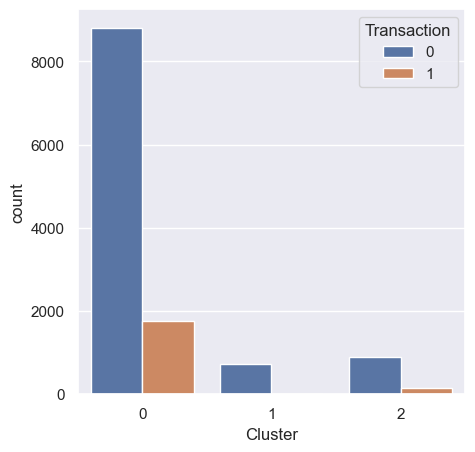

In [118]:
plt.figure(figsize=(5,5))
sns.countplot(x='Cluster', data=ecom_df,hue='Transaction')

In [119]:
ecom_df_crosstab = pd.crosstab(ecom_df['Cluster'],ecom_df['Transaction'], margins= False)

In [120]:
pd.crosstab(ecom_df['Cluster'], ecom_df['Transaction'], margins = True)

Transaction      0     1    All
Cluster                        
0             8812  1754  10566
1              725     3    728
2              885   151   1036
All          10422  1908  12330

* Based on the above:
    * **Cluster 0:** Represents 85.7% of your website visitors (or 10,566). They have a conversion rate of 16.6% and represent 91.9% of all purchased made.
    * **Cluster 1:** Represents 5.9% of your website visitors (or 728). They have a conversion rate of only 0.40% and represent only 0.20% of all purchases made.
    * **Cluster 2:** Represents 8.4% of your website visitors (or 1,036). They have a conversion rate of 14.6% and represent 7.9% of all purchases made.
    
Let's review the mean, by cluster, for all features:

In [121]:
cluster_means = ecom_df.groupby('Cluster').mean()
cluster_means

Administrative  Administrative_Duration  Informational  \
Cluster                                                           
0              2.230740                66.590712       0.527636   
1              0.020604                 0.000000       0.010989   
2              4.788610               282.718154       0.604247   

         Informational_Duration  ProductRelated  ProductRelated_Duration  \
Cluster                                                                    
0                     35.757891       35.785728              1361.286913   
1                      0.015110        1.413462                 0.023123   
2                     45.575083       11.687259               335.759205   

         BounceRates  ExitRates  PageValues  SpecialDay  VisitorType  \
Cluster                                                                
0           0.011652   0.033726    6.492690    0.064414     0.873557   
1           0.194528   0.198339    0.000000    0.065110     0.936813   
2           0.008577   0.029290    3.873345    0.028378     0.616795   

          Weekend  Transaction  
Cluster                         
0        0.234620     0.166004  
1        0.177198     0.004121  
2        0.250965     0.145753

Let's visualize the count of visits by page and the time spend, splitting the data by clusters and if a purchase was made.

First, let's look at the Administrative Pages:

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categor

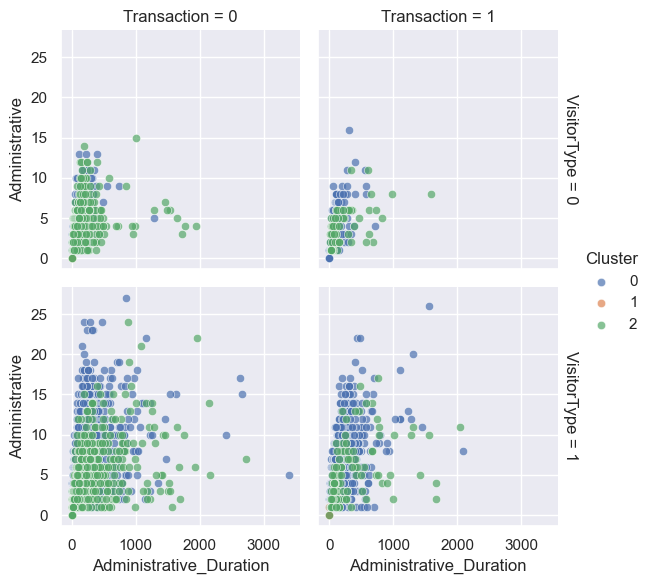

In [122]:
g = sns.FacetGrid(ecom_df, row= "VisitorType", col="Transaction", hue="Cluster", margin_titles=True)
g.map(sns.scatterplot, "Administrative_Duration", "Administrative", alpha=.7)
g.add_legend()

In [123]:
ecom_df.pivot_table(index='Cluster',columns='VisitorType',
                    values=['Administrative','Administrative_Duration'], aggfunc ='mean')

Administrative           Administrative_Duration            
VisitorType              0         1                       0           1
Cluster                                                                 
0                 2.056886  2.255905               57.589246   67.893633
1                 0.000000  0.021994                0.000000    0.000000
2                 4.282116  5.103286              211.807706  326.773627

Based on the above visualization and aggregation of **Administrative & Administrative Duration:** 

* Cluster 2 is about 2x more likely to visit Administrative pages than Cluster 0. Additionally, Cluster 2 spends almost 4.5x more time on Administrative pages vs Cluster 0.
    * This is true, regardless of time of visitor (New or Returning) and especially the case with visitors who have not made a purchase.
    * It means our second largest group of purchasers are spending time viewing information about our company policies and their accounts. This represents a great opportunity to increase conversion.
* Cluster 1 hardly visits and spends almost no time with Administrative pages, which makes sense given they make up little/no purchases.

Now, let's look at Informational Pages:

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categor

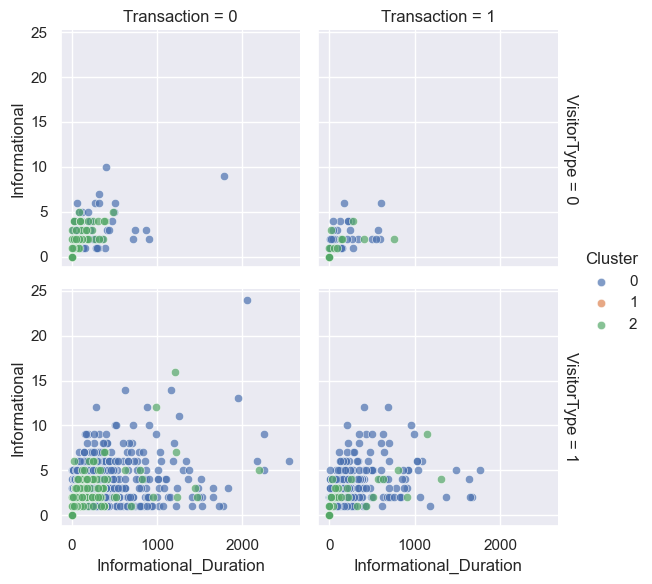

In [124]:
g = sns.FacetGrid(ecom_df, row= "VisitorType", col="Transaction", hue="Cluster", margin_titles=True)
g.map(sns.scatterplot, "Informational_Duration", "Informational", alpha=.7)
g.add_legend()

In [125]:
ecom_df.pivot_table(index='Cluster',columns='VisitorType',
                    values=['Informational','Informational_Duration'], aggfunc ='mean')

Informational           Informational_Duration           
VisitorType             0         1                      0          1
Cluster                                                              
0                0.315868  0.558288              18.962849  38.188896
1                0.000000  0.011730               0.000000   0.016129
2                0.397985  0.732394              20.773749  60.983736

Based on the above visualization and aggregation of **Informational & Informational Duration:** 

* Individuals who do not purchase, both in Cluster 0 and 2, visit and spend an almost equal time with Informational content.


Now, let's look at Product Related Pages:

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categor

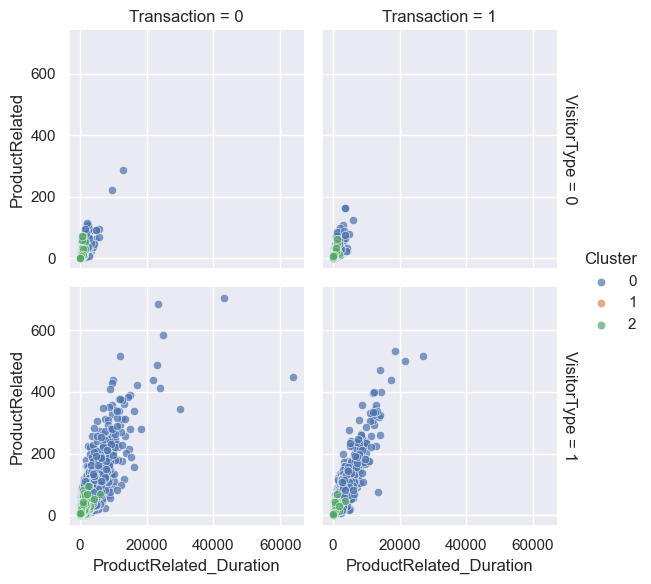

In [126]:
g = sns.FacetGrid(ecom_df, row= "VisitorType", col="Transaction", hue="Cluster", margin_titles=True)
g.map(sns.scatterplot, "ProductRelated_Duration", "ProductRelated", alpha=.7)
g.add_legend()

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categor

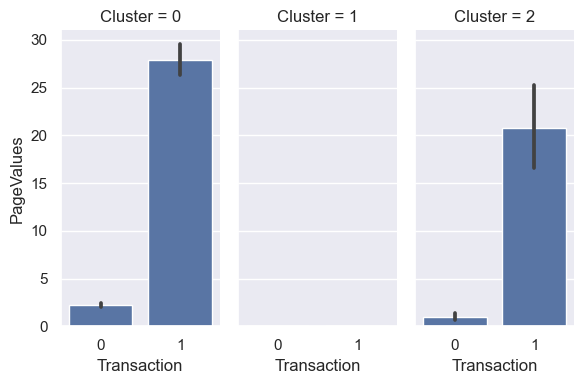

In [127]:
g = sns.FacetGrid(ecom_df, col="Cluster", height=4, aspect=.5)
g.map(sns.barplot, "Transaction", "PageValues", order = [0, 1])

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categor

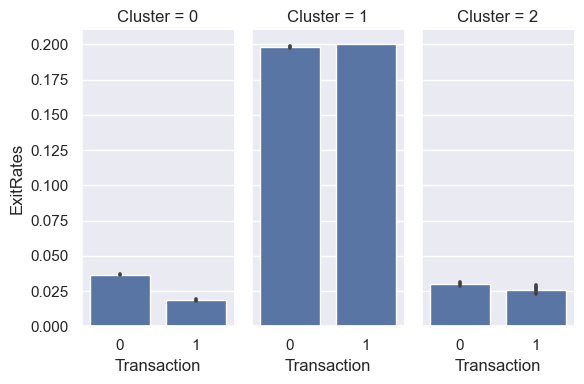

In [128]:
g = sns.FacetGrid(ecom_df, col="Cluster", height=4, aspect=.5)
g.map(sns.barplot, "Transaction", "ExitRates", order = [0, 1])

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categor

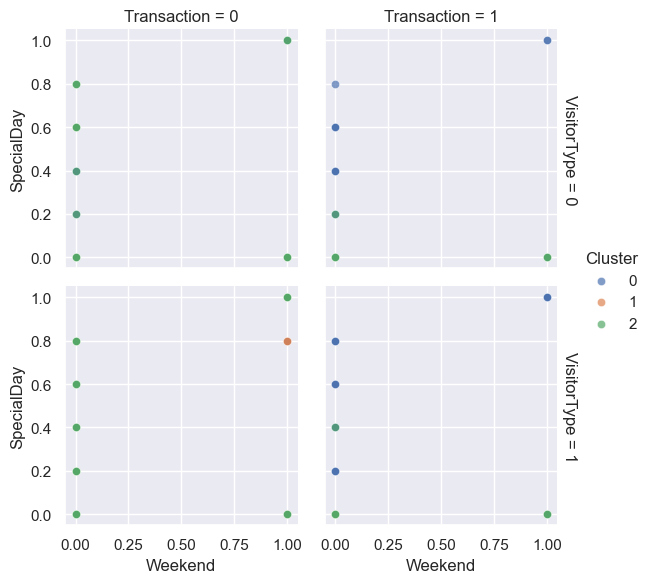

In [129]:
g = sns.FacetGrid(ecom_df, row= "VisitorType", col="Transaction", hue="Cluster", margin_titles=True)
g.map(sns.scatterplot, "Weekend", "SpecialDay", alpha=.7)
g.add_legend()

Based on the Cluster Means and the visualizations above:

* **Informational & Informational Duration:** 
    * Cluster 2 is about 1.1x more likely to visit Informational pages and spends almost 1.3x more time on Informational pages vs Cluster 0. 
        * Both clusters are curious on knowing more about FAQs or addressing customer service related inquiries
* **NEED TO WRITE MORE**

In [130]:
ecom_df.pivot_table(index='Cluster',columns='VisitorType',
                    values='Transaction', aggfunc ='count',margins=True)

VisitorType     0      1    All
Cluster                        
0            1336   9230  10566
1              46    682    728
2             397    639   1036
All          1779  10551  12330

In [131]:
ecom_df.pivot_table(index='Cluster',columns='VisitorType',
                    values='Transaction', aggfunc ='sum',margins=True)

VisitorType    0     1   All
Cluster                     
0            381  1373  1754
1              0     3     3
2             57    94   151
All          438  1470  1908

Let's create 3 groups (clusters), using scaled data, to segment website visitors into:
* E-Window Shopper: Those visitors with high Exist Rates and no purchases
* Purchaser: Those website visitors wo have made a single purchase
    * They will be identified as visitors with Yes in Transaction and Visitor Type of New (or 0)
* Repeat Purchase: Those website visitors who have made multiple purchases
    * They will be identified as visitors with Yes in Transaction and Visitor Type of Returning (or 1)

# Praneetha's Part

In [132]:
cluster_means = ecom_df.groupby('Cluster').mean()
cluster_means

Administrative  Administrative_Duration  Informational  \
Cluster                                                           
0              2.230740                66.590712       0.527636   
1              0.020604                 0.000000       0.010989   
2              4.788610               282.718154       0.604247   

         Informational_Duration  ProductRelated  ProductRelated_Duration  \
Cluster                                                                    
0                     35.757891       35.785728              1361.286913   
1                      0.015110        1.413462                 0.023123   
2                     45.575083       11.687259               335.759205   

         BounceRates  ExitRates  PageValues  SpecialDay  VisitorType  \
Cluster                                                                
0           0.011652   0.033726    6.492690    0.064414     0.873557   
1           0.194528   0.198339    0.000000    0.065110     0.936813   
2           0.008577   0.029290    3.873345    0.028378     0.616795   

          Weekend  Transaction  
Cluster                         
0        0.234620     0.166004  
1        0.177198     0.004121  
2        0.250965     0.145753

In [133]:
transaction_counts = ecom_df.groupby(['Cluster', 'Transaction']).size().unstack(fill_value=0)

In [134]:
transaction_counts

Transaction     0     1
Cluster                
0            8812  1754
1             725     3
2             885   151

In [135]:
cluster_sizes = ecom_df['Cluster'].value_counts()
cluster_sizes

Cluster
0    10566
2     1036
1      728
Name: count, dtype: int64

<Axes: xlabel='Cluster'>

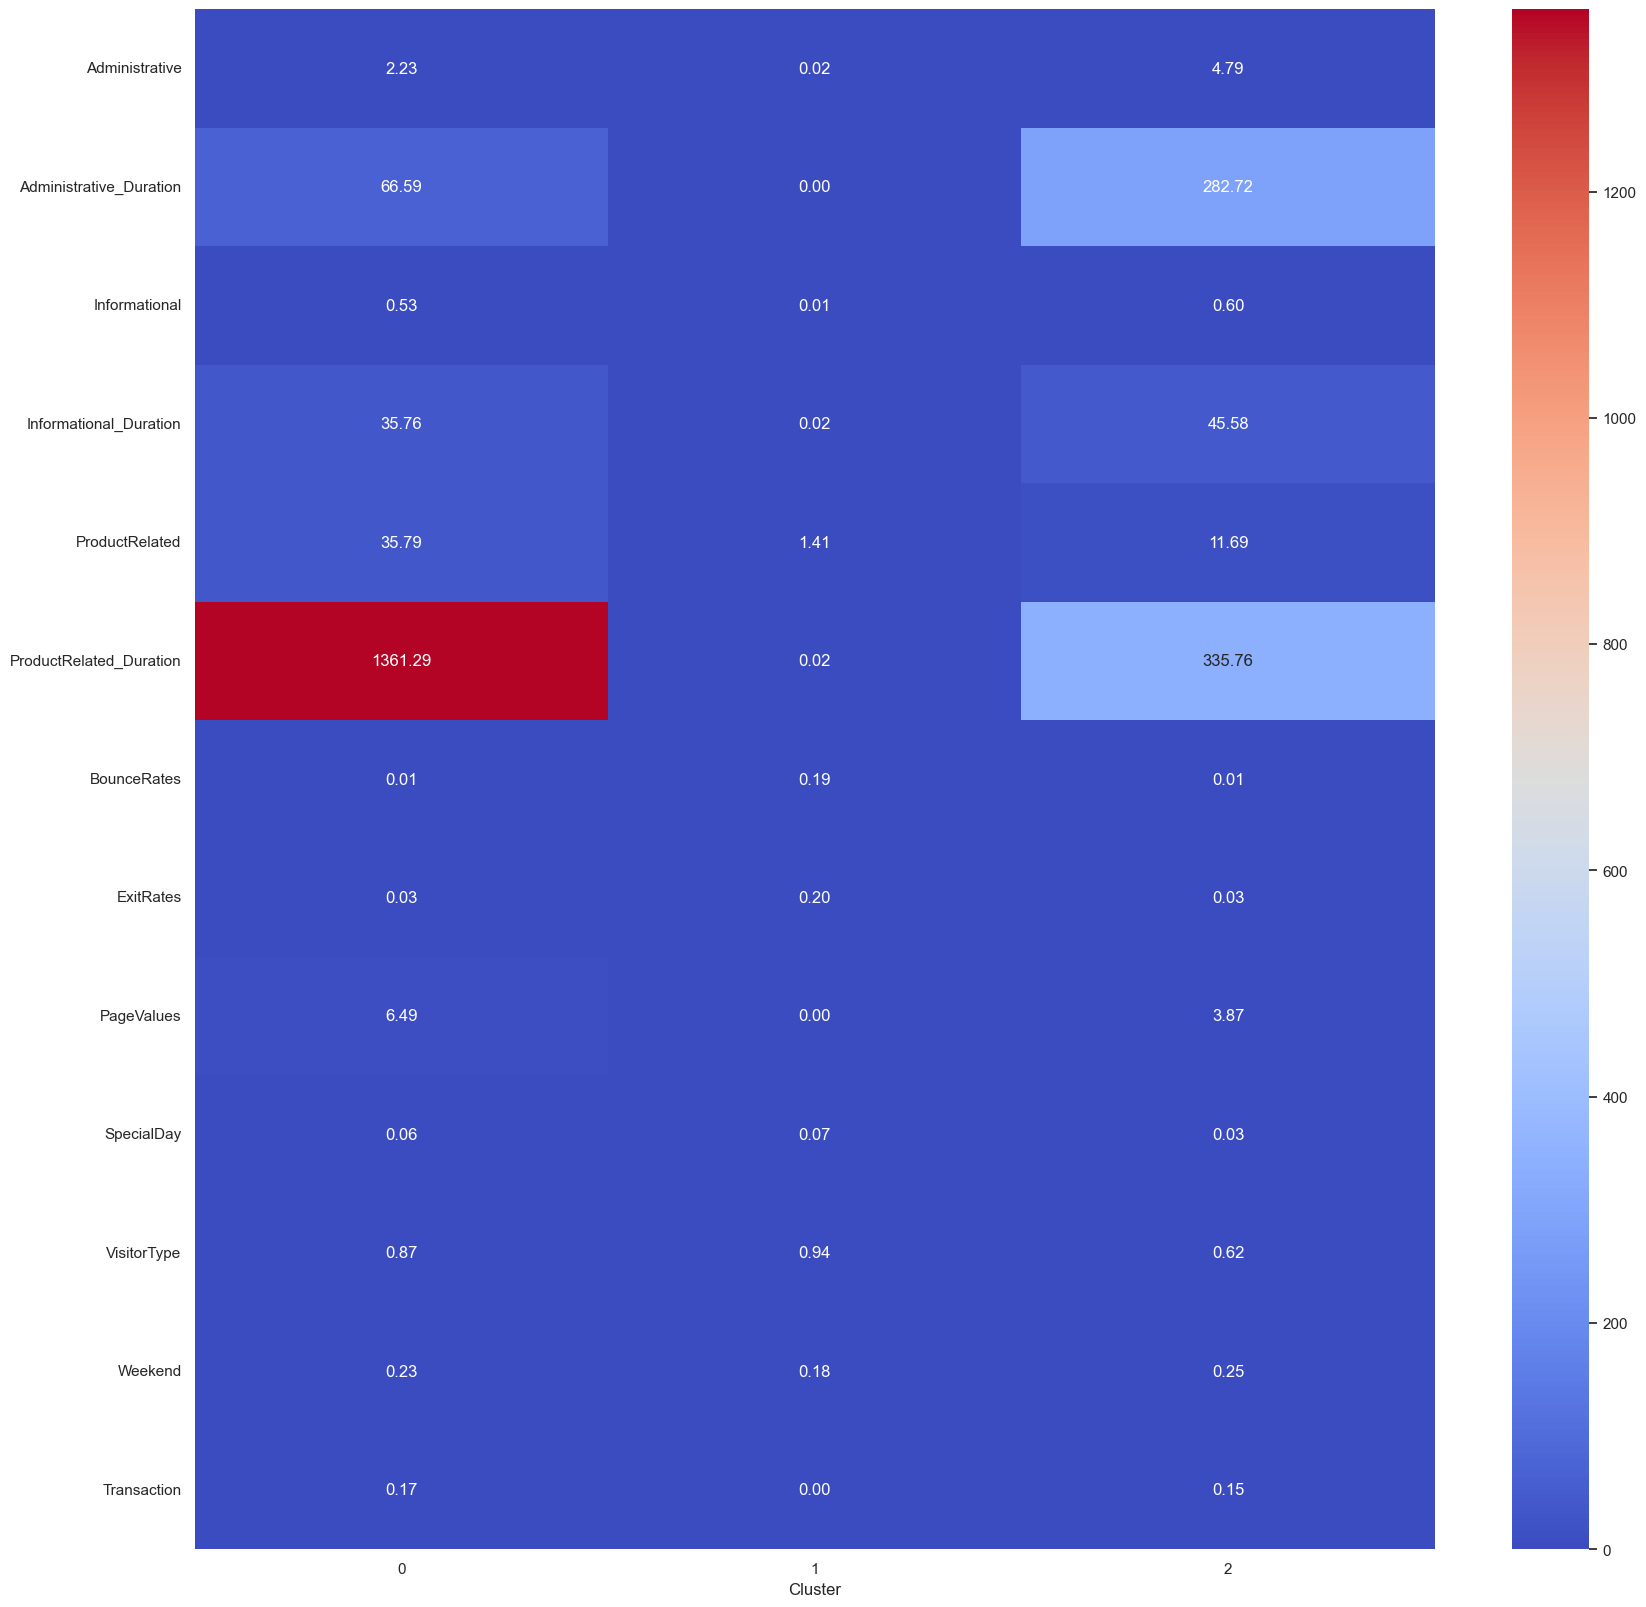

In [136]:
import seaborn as sns
sns.heatmap(cluster_means.T, annot=True, cmap='coolwarm', fmt=".2f")

In [137]:
import pandas as pd

# Assuming 'data' is your DataFrame with the 'Cluster' column
cluster_means = ecom_df.groupby('Cluster').mean()

# Create a pivot table
table = pd.pivot_table(cluster_means, index='Cluster', values=ecom_df.columns[:-1], aggfunc='mean')

# Display the table
print(table)


         Administrative  Administrative_Duration  BounceRates  ExitRates  \
Cluster                                                                    
0              2.230740                66.590712     0.011652   0.033726   
1              0.020604                 0.000000     0.194528   0.198339   
2              4.788610               282.718154     0.008577   0.029290   

         Informational  Informational_Duration  PageValues  ProductRelated  \
Cluster                                                                      
0             0.527636               35.757891    6.492690       35.785728   
1             0.010989                0.015110    0.000000        1.413462   
2             0.604247               45.575083    3.873345       11.687259   

         ProductRelated_Duration  SpecialDay  Transaction  VisitorType  \
Cluster                                                                  
0                    1361.286913    0.064414     0.166004     0.873557   
1     

### Cluster 0:

Administrative and Duration: Users in Cluster 0 have relatively higher values for administrative-related pages and spend more time on those pages.

Bounce and Exit Rates: This cluster has lower bounce rates and exit rates, indicating users are more engaged and less likely to leave the site quickly.

Informational Pages: Users visit a moderate number of informational pages.

PageValues: Users in this cluster tend to have higher page values, suggesting a higher likelihood of transactions.

Product-Related Pages: Users view a higher number of product-related pages and spend more time on them.

Weekend and Visitor Type: A significant portion of users in this cluster are returning visitors, and a relatively higher percentage of sessions occur on weekends. 


### Cluster 1:

Administrative and Duration: Users in Cluster 1 have very low values for administrative-related pages, and the duration is almost negligible.

Bounce and Exit Rates: This cluster has significantly higher bounce rates and exit rates, indicating a quick departure from the site.

Informational Pages: Users rarely visit informational pages.

PageValues: Page values are consistently low, suggesting a lower likelihood of transactions.

Product-Related Pages: Users view a small number of product-related pages, and the duration is very low.

Weekend and Visitor Type: A majority of users in this cluster are returning visitors, and a relatively lower percentage of sessions occur on weekends.


### Cluster 2:

Administrative and Duration: Users in Cluster 2 have higher values for administrative-related pages, and the duration is high.

Bounce and Exit Rates: This cluster has very lower bounce rates and exit rates.

Informational Pages: Users visit a higher number of informational pages and spend more time.

PageValues: Page values are moderate, suggesting a moderate likelihood of transactions.

Product-Related Pages: Users view a moderate number of product-related pages and spend a moderate amount of time on them.

Weekend and Visitor Type: A significant portion of users in this cluster are new visitors, and a relatively higher percentage of sessions occur on weekends.

These observations provide a high-level understanding of the characteristics of users in each cluster.


### Cluster 0:

Transaction Rate: Users in Cluster 0 have a transaction rate of approximately 16.6%. This suggests that around 16.6% of sessions in this cluster result in a transaction.

### Cluster 1:

Transaction Rate: Users in Cluster 1 have a very low transaction rate of approximately 0.4%. This indicates that a very small percentage of sessions in this cluster result in a transaction.

### Cluster 2:

Transaction Rate: Users in Cluster 2 have a transaction rate of approximately 14.6%. This suggests that around 14.6% of sessions in this cluster result in a transaction.

### General Inferences:

Transaction Rates Comparison: Cluster 1 has the lowest transaction rate, indicating that users in this cluster are less likely to make transactions compared to the other clusters.
    
Cluster 0 vs. Cluster 2: Cluster 0 and Cluster 2 have relatively similar transaction rates, but other characteristics (such as the type of visitor, the number of administrative pages visited, etc.) differ.

### Cluster 0: Engaged and Likely to Transact
    
### Recommendations:
    
Enhance Administrative Pages: Since users in this cluster show interest in administrative pages, consider improving and optimizing these pages for a smoother user experience.
    
Promotions on Product Pages: Given the higher engagement with product-related pages, implement targeted promotions and discounts on these pages to encourage transactions.
    
Loyalty Programs: Recognizing that a significant portion are returning visitors, introduce loyalty programs or exclusive offers for repeat customers.
    
### Cluster 1: Low Engagement and Transaction Rate
    
### Recommendations:
    
Improve Page Relevance: Optimize content on the site to make it more relevant to users in this cluster, addressing the high bounce and exit rates.
    
Enhance User Experience: Evaluate and enhance the overall user experience to encourage users to spend more time on the site and explore product-related pages.
    
Targeted Marketing: Implement targeted marketing campaigns to re-engage returning visitors and encourage them to explore the site further.
    
### Cluster 2: Moderate Engagement and Transaction Rate
    
### Recommendations:
    
Welcome Campaigns: Since a significant portion are new visitors, implement welcome campaigns and special offers for first-time users to encourage initial transactions.
    
Weekend Promotions: Given the higher percentage of sessions on weekends, consider running weekend-specific promotions and marketing campaigns to capitalize on increased user activity during those days.
    
Informational Content: As users in this cluster show interest in informational pages, create engaging and informative content to keep them on the site.
    
### General Recommendations:
    
should add moreee here

Regular Analysis:

Periodically reevaluate clusters and user behavior to adapt marketing strategies based on evolving trends.

### Cluster 0: Stars

Characteristics: Users actively exploring pages, contributing to a moderate transaction rate.

BCG Matrix: This cluster represents "Stars" as it has both high market growth (active exploration) and high market share (moderate transaction rate). 
Recommendations include continued investment to capitalize on their potential growth.
    
### Cluster 1: Question Marks

Characteristics: Users in this cluster exhibit quick bounces with a very low transaction rate.

BCG Matrix: This cluster is classified as "Question Marks" due to low market share (low transaction rate) in a high-growth market. 

Strategies may involve deciding whether to invest further to turn them into "Stars" or reconsider their positioning.
    
### Cluster 2: Cash Cows

Characteristics: These users, including new visitors, are more active on weekends, showcasing a moderate transaction rate.

BCG Matrix: This cluster represents "Cash Cows" with a high market share (moderate transaction rate) in a low-growth market (weekends). 

Strategies may involve maintaining and optimizing their engagement, as they are already delivering value.
    
These classifications align with the BCG Matrix strategy of allocating resources based on market growth and market share.